#**Lead Scoring Case Study**

## **Problem Statement**
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.



The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.



Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

The company requires a model to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance.


##**Goals**
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.



## **Steps Followed**

1. Importing the required Libraries
2. Data Loading and Understanding
3. Data Cleansing
4. EDA
5. Model Building
6. Model Evaluation


## **Importing the required Libraries**


In [309]:
#importing pandas and numpy libraries for data analysis and manipulation
import pandas as pd
import numpy as np

#importing libraries for data visualtions
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries reqiuied for building and evaluating ML model
from sklearn.feature_selection import RFE#Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression

#ignore warnings by filtering them
import warnings
warnings.filterwarnings('ignore')

#Settings to display all rows and columns in the output
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

## **Data Loading and Understanding**

### **Import the dataset**

In [310]:
leads_data_df = pd.read_csv('Leads.csv')

### **Understanding the data**

In [311]:
#Shape of the data
leads_data_df.shape

(9240, 37)

No. of rows:9240

No. of columns:37

In [312]:
#Head
leads_data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [313]:
#Dataframe Information
leads_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

After comparing with the data dictionary provided, the data types seem to be all fine .

Some of these columns have high percentage of missing values

In [314]:
#Checking the statistical information of numerical columns
leads_data_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [315]:
#Getting the number of unique values in all the columns
leads_data_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

## **Data Cleansing**

### **Missing Values**

#### **Mapping select as Null**

Some of the columns in the data have the word 'Select'. This is probably that some of the attributes in the form have  list of values with 'Select' as display name and some of the users might not have selected anything which is like null only. So mapping select as null in all occurances

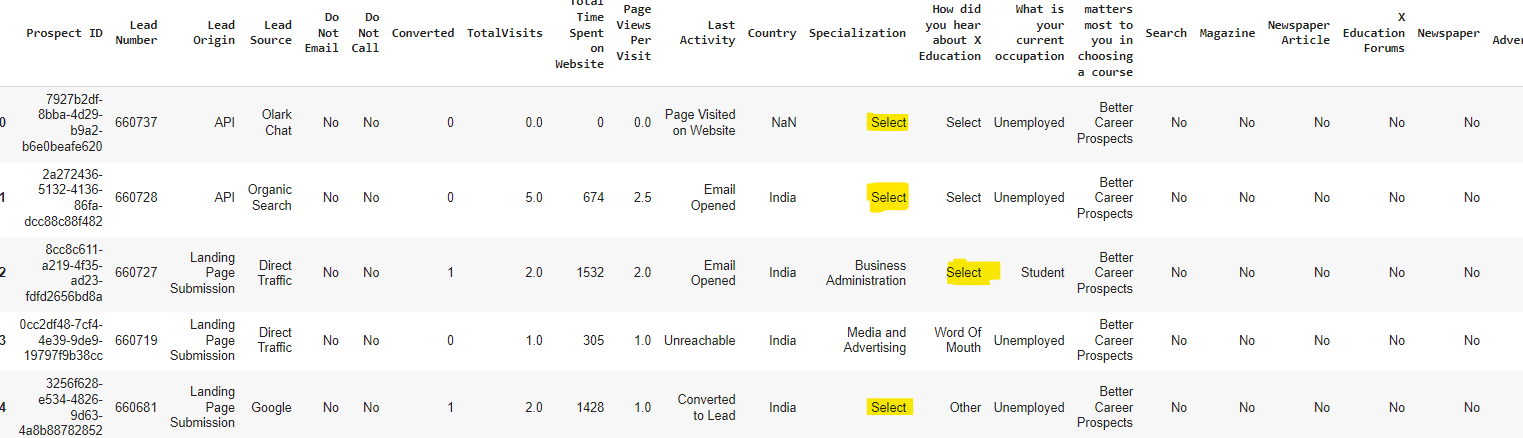

In [316]:
#mapping null to 'select'
leads_data_df=leads_data_df.replace("Select",np.nan)

In [317]:
#checking head now
leads_data_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### **Dropping Columns with high percentage of missing values**

In [318]:
#Checking for percentage of missing values
leads_data_df.isna().mean().sort_values(ascending=False)*100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [319]:
#Identifying columns with more than 40% values missing:
l_cols_high_missing_values = list(leads_data_df.columns[round(leads_data_df.isna().mean()*100,2)>40])
print("no of columns to drop:",len(l_cols_high_missing_values))

#Dropping the columns:
leads_data_df.drop(columns=l_cols_high_missing_values,inplace=True)

print("Shape of the dataframe after dropping the columns:",leads_data_df.shape)

no of columns to drop: 7
Shape of the dataframe after dropping the columns: (9240, 30)


#### **Dropping Prsopect ID and Lead Number Columns**
Dropping Prsopect ID and Lead Number Columns as they have all unique values

In [320]:
unused_cols_to_drop =['Prospect ID','Lead Number']

leads_data_df.drop(unused_cols_to_drop,axis=1,inplace=True)

#### **Dropping columns with constant value throughout the rows**

Theer are few columns which have constant value in all the rows and hence its better to drop those

In [321]:
cols_with_const = [col for col in leads_data_df.columns if len(set(leads_data_df[col]))==1]
print('columns with cconstant values are :', cols_with_const)

columns with cconstant values are : ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [322]:
leads_data_df = leads_data_df.drop(columns=cols_with_const,axis=1)

In [323]:
leads_data_df.shape

(9240, 23)

In [324]:
#Getting the number of unique values in all the columns
leads_data_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement                               2
Through Recommendations     

#### **Imputing missing values**

In [325]:
#Checking for percentage of missing values
leads_data_df.isna().mean().sort_values(ascending=False)*100

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
X Education Forums                                0.000000
A free copy of Mastering The Interview            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
Lead Origin                                       0.000000
Newspaper Article                                 0.0000

Missing values are still found in
1. City,
2. Specialization,
3. Tags,
4. What matters most to you in choosing a course,
5. What is your current occupation,
6. Country,
7. TotalVisits,
8. Page Views Per Visit,
9. Last Activity
10. Lead Source

Checking the datatypes:

In [326]:
leads_data_df[['City','Specialization','Tags','What matters most to you in choosing a course','What is your current occupation','Country','TotalVisits','Page Views Per Visit','Last Activity','Lead Source']].dtypes

City                                              object
Specialization                                    object
Tags                                              object
What matters most to you in choosing a course     object
What is your current occupation                   object
Country                                           object
TotalVisits                                      float64
Page Views Per Visit                             float64
Last Activity                                     object
Lead Source                                       object
dtype: object

##### **Imputing missing values for categorical columns**

In [327]:
#Checking the value_counts before selecting the imputation method
cat_cols_with_nulls = ['City','Specialization','Tags','What matters most to you in choosing a course','What is your current occupation','Country','Last Activity','Lead Source']

for i in cat_cols_with_nulls:
  print('Col name : ',i)
  print('------------------------------')
  print(leads_data_df[i].value_counts(normalize=True,dropna=False)*100)
  print('*******************************************************')

Col name :  City
------------------------------
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64
*******************************************************
Col name :  Specialization
------------------------------
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
Interna

Its seen that the Lead Source column has Google category in two differnt forms "Google and google". Replacing "google" with "Google"

In [328]:
leads_data_df['Lead Source'] = leads_data_df['Lead Source'].replace("google","Google")

In [329]:
#Checking the value_counts again before selecting the imputation method
for i in cat_cols_with_nulls:
  print('Col name : ',i)
  print('------------------------------')
  print(leads_data_df[i].value_counts(normalize=True,dropna=False)*100)
  print('*******************************************************')

Col name :  City
------------------------------
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64
*******************************************************
Col name :  Specialization
------------------------------
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
Interna

Based on above output the missing values can be imputed with mode for 'City','Tags','What matters most to you in choosing a course','What is your current occupation','Country','Last Activity','Lead Source'.

For 'Specialization' its better not to impute mode as the percentage of missing value is very high and there is similar percentage for:

**Finance Management:**                   10.56%

**Human Resource Management:**             9.17%

**Marketing Management:**                  9.06%

which are the top 3 categories in this column

In [330]:
#cols to imputw with mode
cols_to_impute_mode = ['City','Tags','What matters most to you in choosing a course','What is your current occupation','Country','Last Activity','Lead Source']

for i in cols_to_impute_mode:
  mode_val = leads_data_df[i].mode()[0]
  leads_data_df[i] = leads_data_df[i].replace(np.nan,mode_val)


In [331]:
leads_data_df['Specialization'] = leads_data_df['Specialization'].replace(np.nan,'Others')

In [332]:
#Checking the value_counts before selecting after imputating mode
for i in cat_cols_with_nulls:
  print('Col name : ',i)
  print('------------------------------')
  print(leads_data_df[i].value_counts(normalize=True,dropna=False)*100)
  print('*******************************************************')

Col name :  City
------------------------------
Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64
*******************************************************
Col name :  Specialization
------------------------------
Others                               36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
H

##### **Imputing missing values for continuous columns**

Before imputing missing values for continuous columns checking for any outliers with the help of describe

In [333]:
leads_data_df[['TotalVisits','Page Views Per Visit']].describe()


,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


Clearly it can be seen that there is a huge gap between 75th percentile value and max value in these columns and hence outliers are present. So its better to impute the nulls with median

In [334]:
cont_cols_impute_median = ['TotalVisits','Page Views Per Visit']

for i in cont_cols_impute_median:
  median_val = leads_data_df[i].median()
  leads_data_df[i] = leads_data_df[i].replace(np.nan,median_val)

In [335]:
#Checking for percentage of missing values
leads_data_df.isna().mean().sort_values(ascending=False)*100

Lead Origin                                      0.0
What matters most to you in choosing a course    0.0
A free copy of Mastering The Interview           0.0
City                                             0.0
Tags                                             0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Search                                           0.0
What is your current occupation                  0.0
Lead Source                                      0.0
Specialization                                   0.0
Country                                          0.0
Last Activity                                    0.0
Page Views Per Visit                             0.0
Total Time Spent on Website                      0.0
TotalVisits                                   

## **Exploratory Data Analysis**

### **Target Column**
The target column is 'Converted'


In [336]:
#Checking percentage imbalance in "Converted" Column
leads_data_df["Converted"].value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

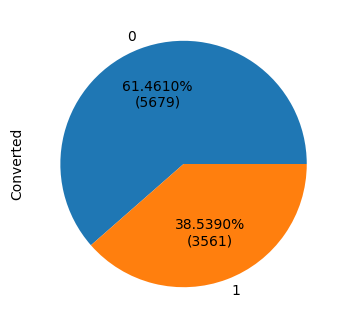

In [337]:
total=leads_data_df["Converted"].count()
leads_data_df["Converted"].value_counts(normalize=True).plot(kind='pie', figsize=(6,4),autopct=lambda x:'{:.4f}%\n({:.0f})'.format(x, total*x/100))
plt.show()

In [338]:
conv = len(leads_data_df[leads_data_df["Converted"]==1])
print("Total Converted:", conv)
not_conv = len(leads_data_df[leads_data_df["Converted"]==0])
print("Total non-Converted:",not_conv)

Imbalance_Ratio = conv/not_conv
print("Imbalance_Ratio:",Imbalance_Ratio)

Total Converted: 3561
Total non-Converted: 5679
Imbalance_Ratio: 0.6270470153195985


### **Classifying the columns to categorical and continuous**

In [339]:
leads_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [340]:
cat_cols = leads_data_df.columns[leads_data_df.dtypes=="object"].tolist()
print('Categorical Columns: ',cat_cols)
print(len(cat_cols))
cont_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
print('Continuous Columns: ',cont_cols)

Categorical Columns:  ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']
19
Continuous Columns:  ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


### **Univariate Analysis**

#### **Categorical Columns**

Since there are many columns , the univariate analysis is done in small set of groups

##### **Lead Origin, Lead Source:**

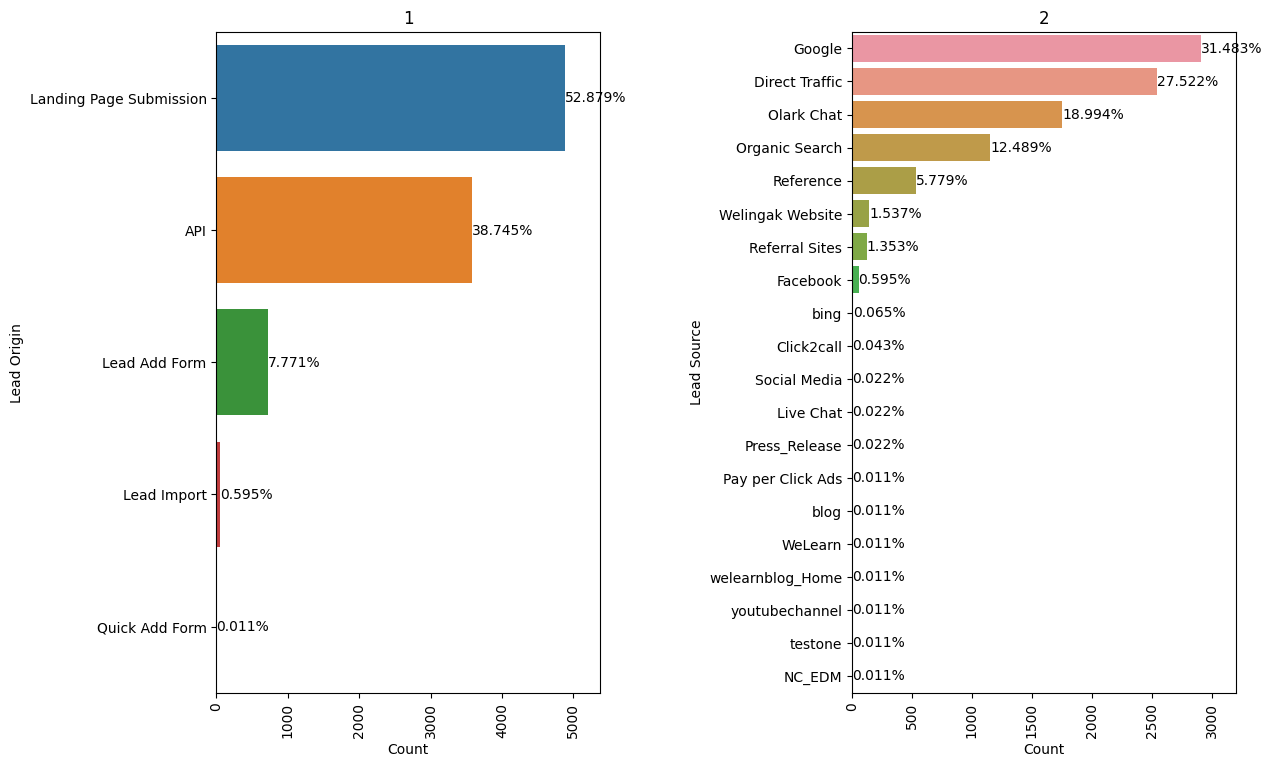

In [341]:
#Plotting a countplot graph for analysing the columns
cat_cols = ['Lead Origin', 'Lead Source']
plt.figure(figsize=(20,40))
for i in range(1,len(cat_cols)+1):
  x= cat_cols[i-1]
  plt.subplot(5,3,i)
  obj_plot=sns.countplot(data=leads_data_df,y=leads_data_df[x],order=leads_data_df[x].value_counts().index)
  total = leads_data_df[x].count()
  obj_plot.bar_label(obj_plot.containers[0], fmt=lambda x: f'{(x/total)*100:0.3f}%')
  obj_plot.margins(x=0.1)
  obj_plot.set(xlabel='Count', ylabel=x,title=i)
  plt.xticks(rotation=90)

plt.tight_layout(pad=5.0)
plt.show()



From above its seen that most if the leads from Lead Source are having very small percentage of counts and hence can be combined together for better readability and analysis

In [342]:
leads_data_df['Lead Source'] = leads_data_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat'] ,'Other Sources')

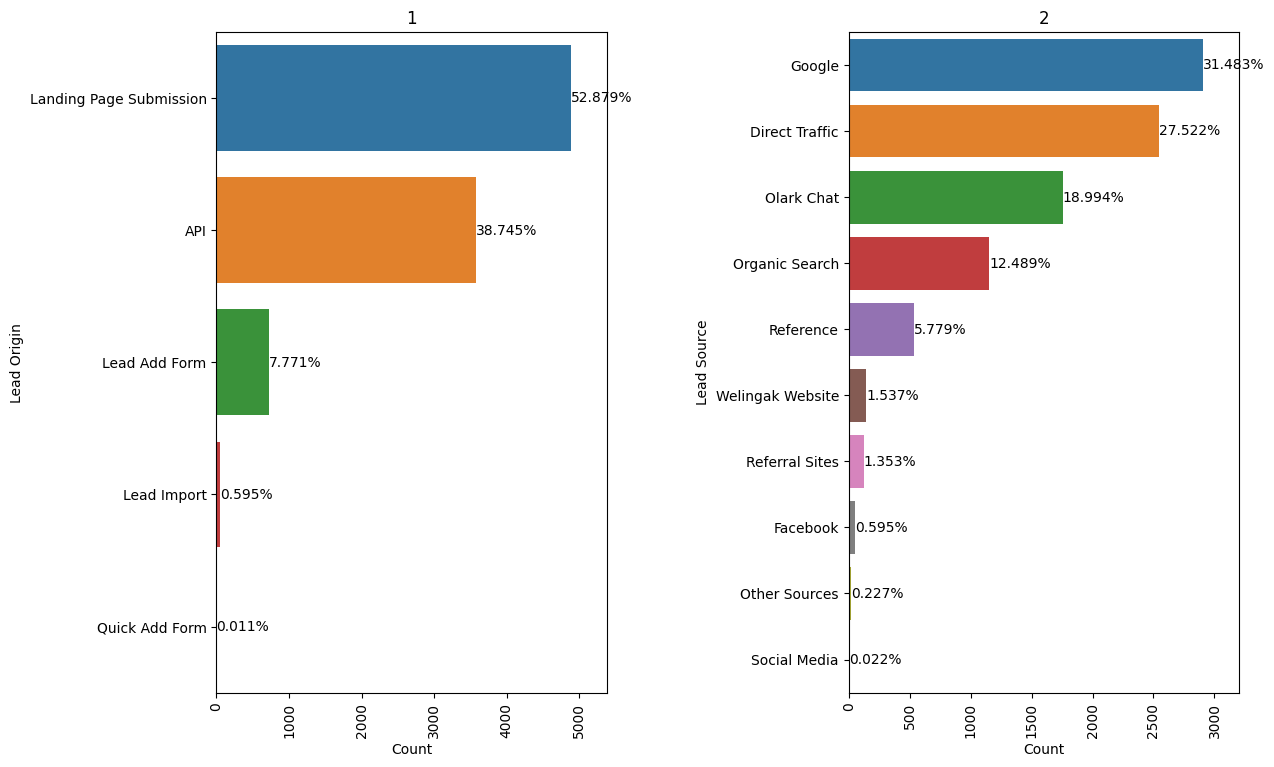

In [343]:
#Replotting the countplot graph for analysing the columns
cat_cols = ['Lead Origin', 'Lead Source']
plt.figure(figsize=(20,40))
for i in range(1,len(cat_cols)+1):
  x= cat_cols[i-1]
  plt.subplot(5,3,i)
  obj_plot=sns.countplot(data=leads_data_df,y=leads_data_df[x],order=leads_data_df[x].value_counts().index)
  total = leads_data_df[x].count()
  obj_plot.bar_label(obj_plot.containers[0], fmt=lambda x: f'{(x/total)*100:0.3f}%')
  obj_plot.margins(x=0.1)
  obj_plot.set(xlabel='Count', ylabel=x,title=i)
  plt.xticks(rotation=90)

plt.tight_layout(pad=5.0)
plt.show()

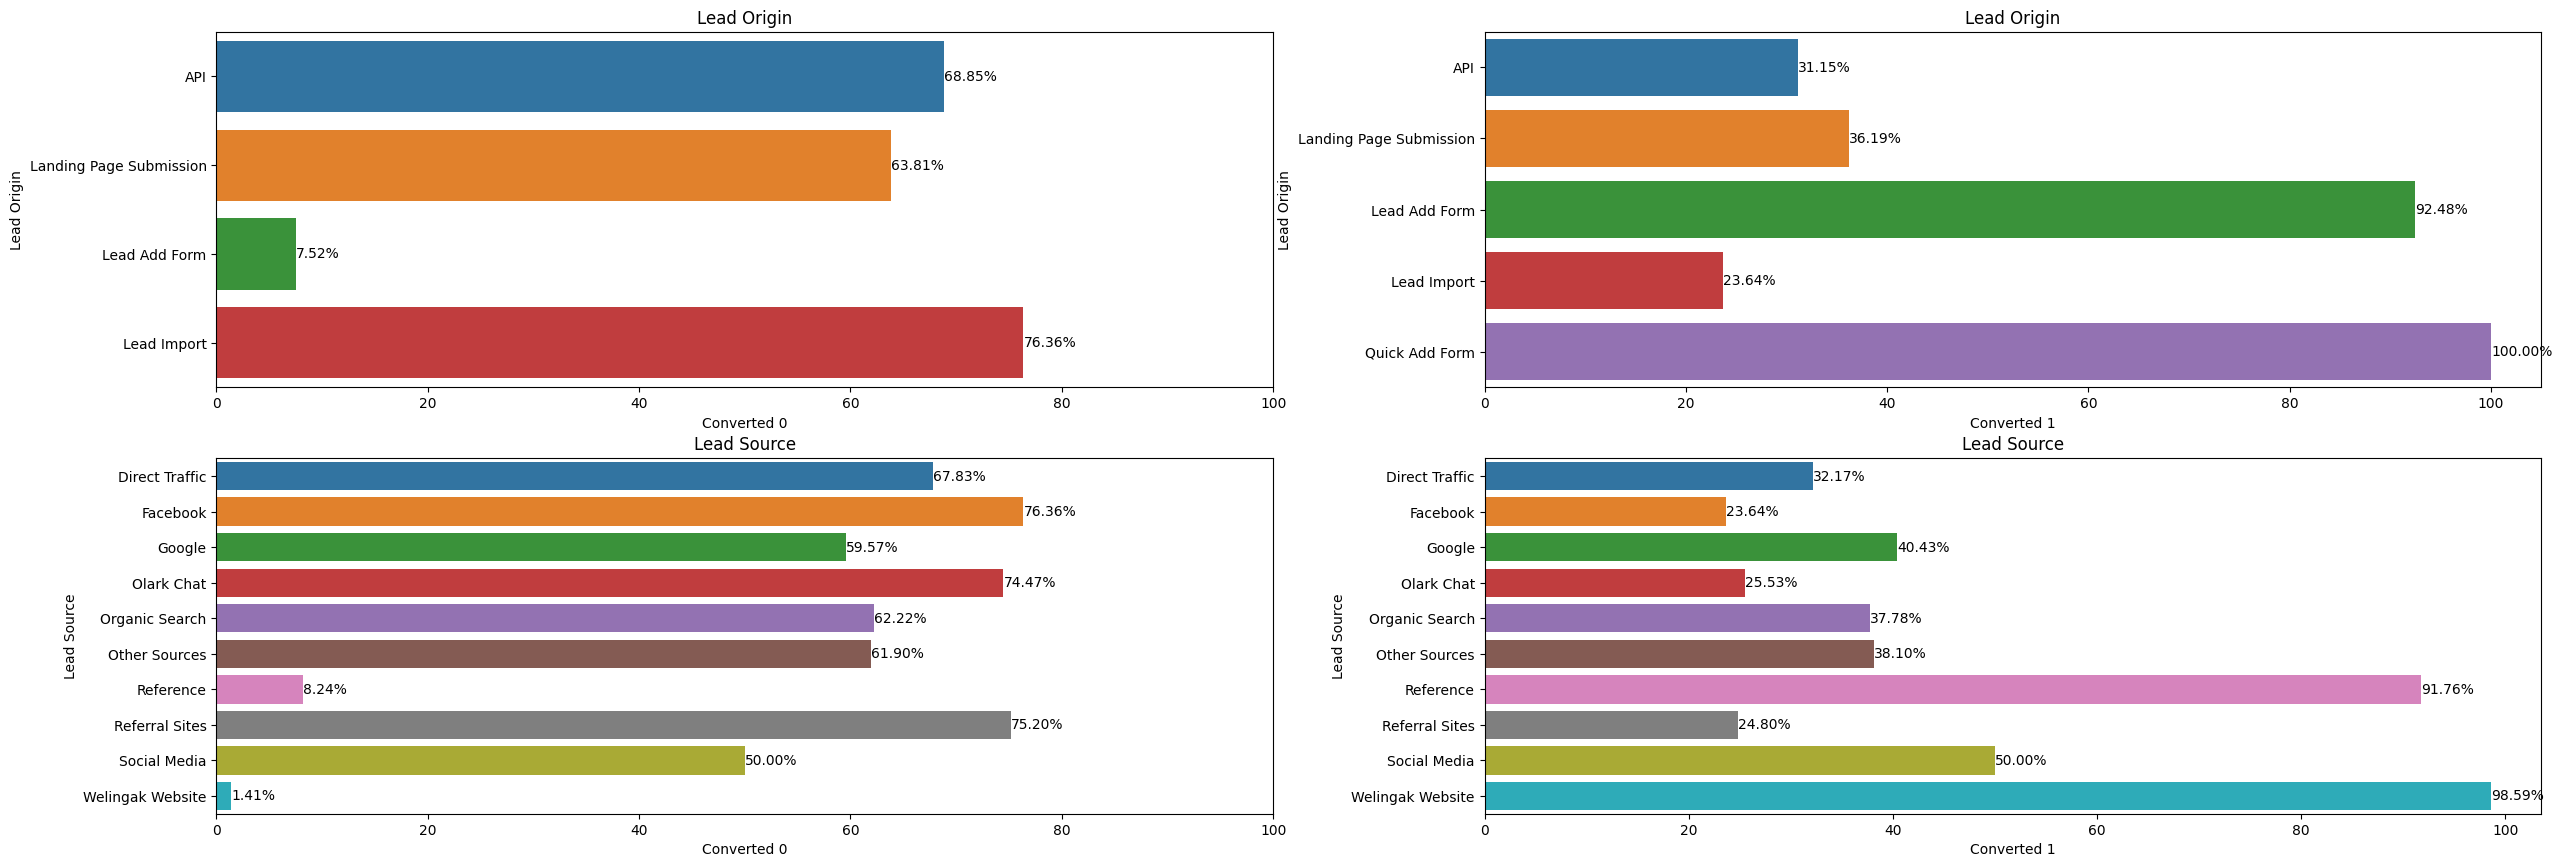

In [344]:
#Plotting a bar graph for analysing each category in the columns w.r.t Converted
plt.figure(figsize=(30,60))
for i in range(1,len(cat_cols)+1):

  x= cat_cols[i-1]
  apln_temp_df=leads_data_df.groupby([x,"Converted"]).size().reset_index(name='COUNTS')
  apln_temp_df["GRP_TOT"] = apln_temp_df.groupby(x)['COUNTS'].transform('sum')
  apln_temp_df["GRP_PCT"] = round(apln_temp_df["COUNTS"]/apln_temp_df["GRP_TOT"] * 100,2)

  plt.subplot(11,2,(2*i)-1)
  x_axis = apln_temp_df[apln_temp_df["Converted"]==0][x]
  y_axis = apln_temp_df[apln_temp_df["Converted"]==0]["GRP_PCT"]
  ax =sns.barplot(data=apln_temp_df,x=y_axis,y=x_axis)
  ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.2f}%')
  ticks = [0, 20, 40, 60,80,100]
  ax.set_xticks(ticks)
  #  plt.xticks(rotation=90)
  plt.title(x)
  plt.xlabel("Converted 0")

  plt.subplot(11,2,(2*i))
  x_axis = apln_temp_df[apln_temp_df["Converted"]==1][x]
  y_axis = apln_temp_df[apln_temp_df["Converted"]==1]["GRP_PCT"]
  ax =sns.barplot(data=apln_temp_df,x=y_axis,y=x_axis)
  ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.2f}%')
  ticks = [0, 20, 40, 60,80,100]
  ax.set_xticks(ticks)
  #  plt.xticks(rotation=90)
  plt.title(x)
  plt.xlabel("Converted 1")

**Highlights**
1. The Lead Origin "Lead Add Form" has very few leads but the conversion rate is very good(nearly 93%)
2. The Lead Origins "Landing Page Submission" and "API" have many leads but the conversion is low (about 36% for "Landing Page Submission" about 31% for "API")
3. Of all the Lead Sources "Reference" has medium leads but a good conversion rate with 92%.Similarly Wellingak Websiite also has better lead conversion rate(98%).
4. Leads from "Google" are good but conversion rate is just below average(40%).


##### **'Do Not Email', 'Do Not Call'**

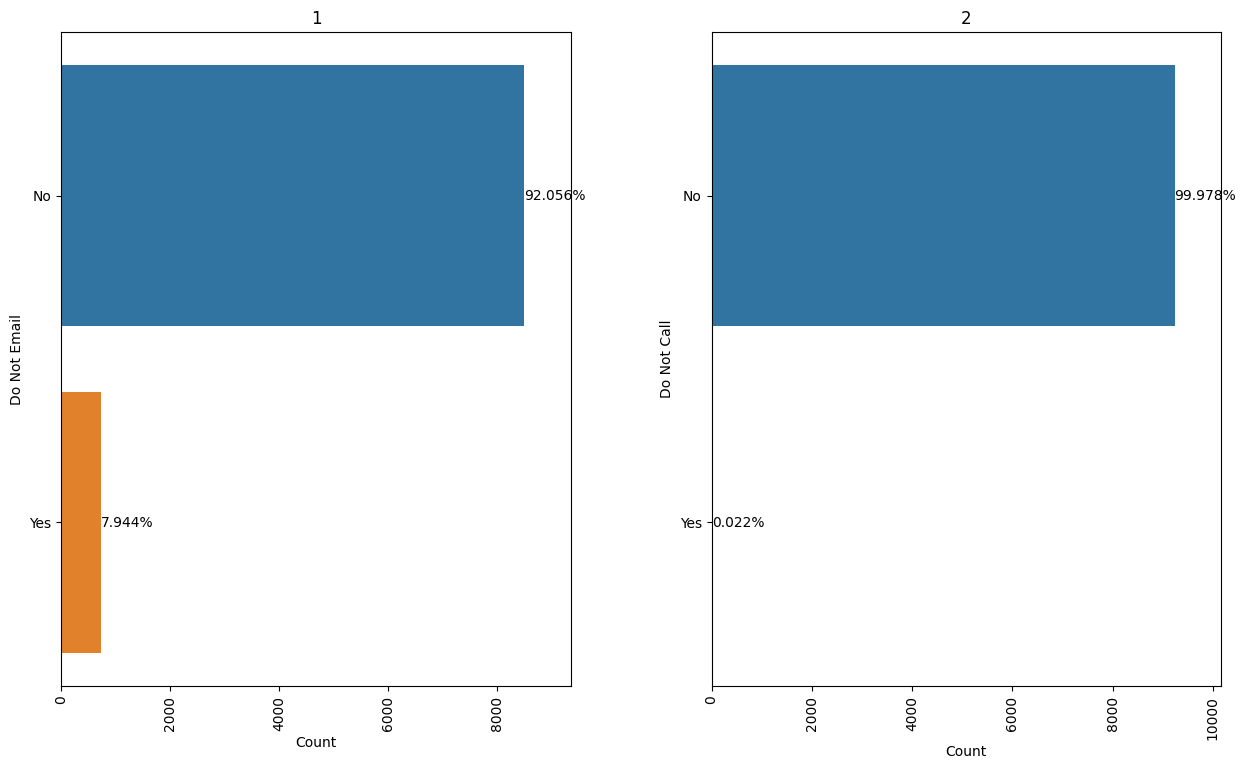

In [345]:
#Plotting a countplot graph for analysing the columns
cat_cols = ['Do Not Email', 'Do Not Call']
plt.figure(figsize=(20,40))
for i in range(1,len(cat_cols)+1):
  x= cat_cols[i-1]
  plt.subplot(5,3,i)
  obj_plot=sns.countplot(data=leads_data_df,y=leads_data_df[x],order=leads_data_df[x].value_counts().index)
  total = leads_data_df[x].count()
  obj_plot.bar_label(obj_plot.containers[0], fmt=lambda x: f'{(x/total)*100:0.3f}%')
  obj_plot.margins(x=0.1)
  obj_plot.set(xlabel='Count', ylabel=x,title=i)
  plt.xticks(rotation=90)

plt.tight_layout(pad=5.0)
plt.show()

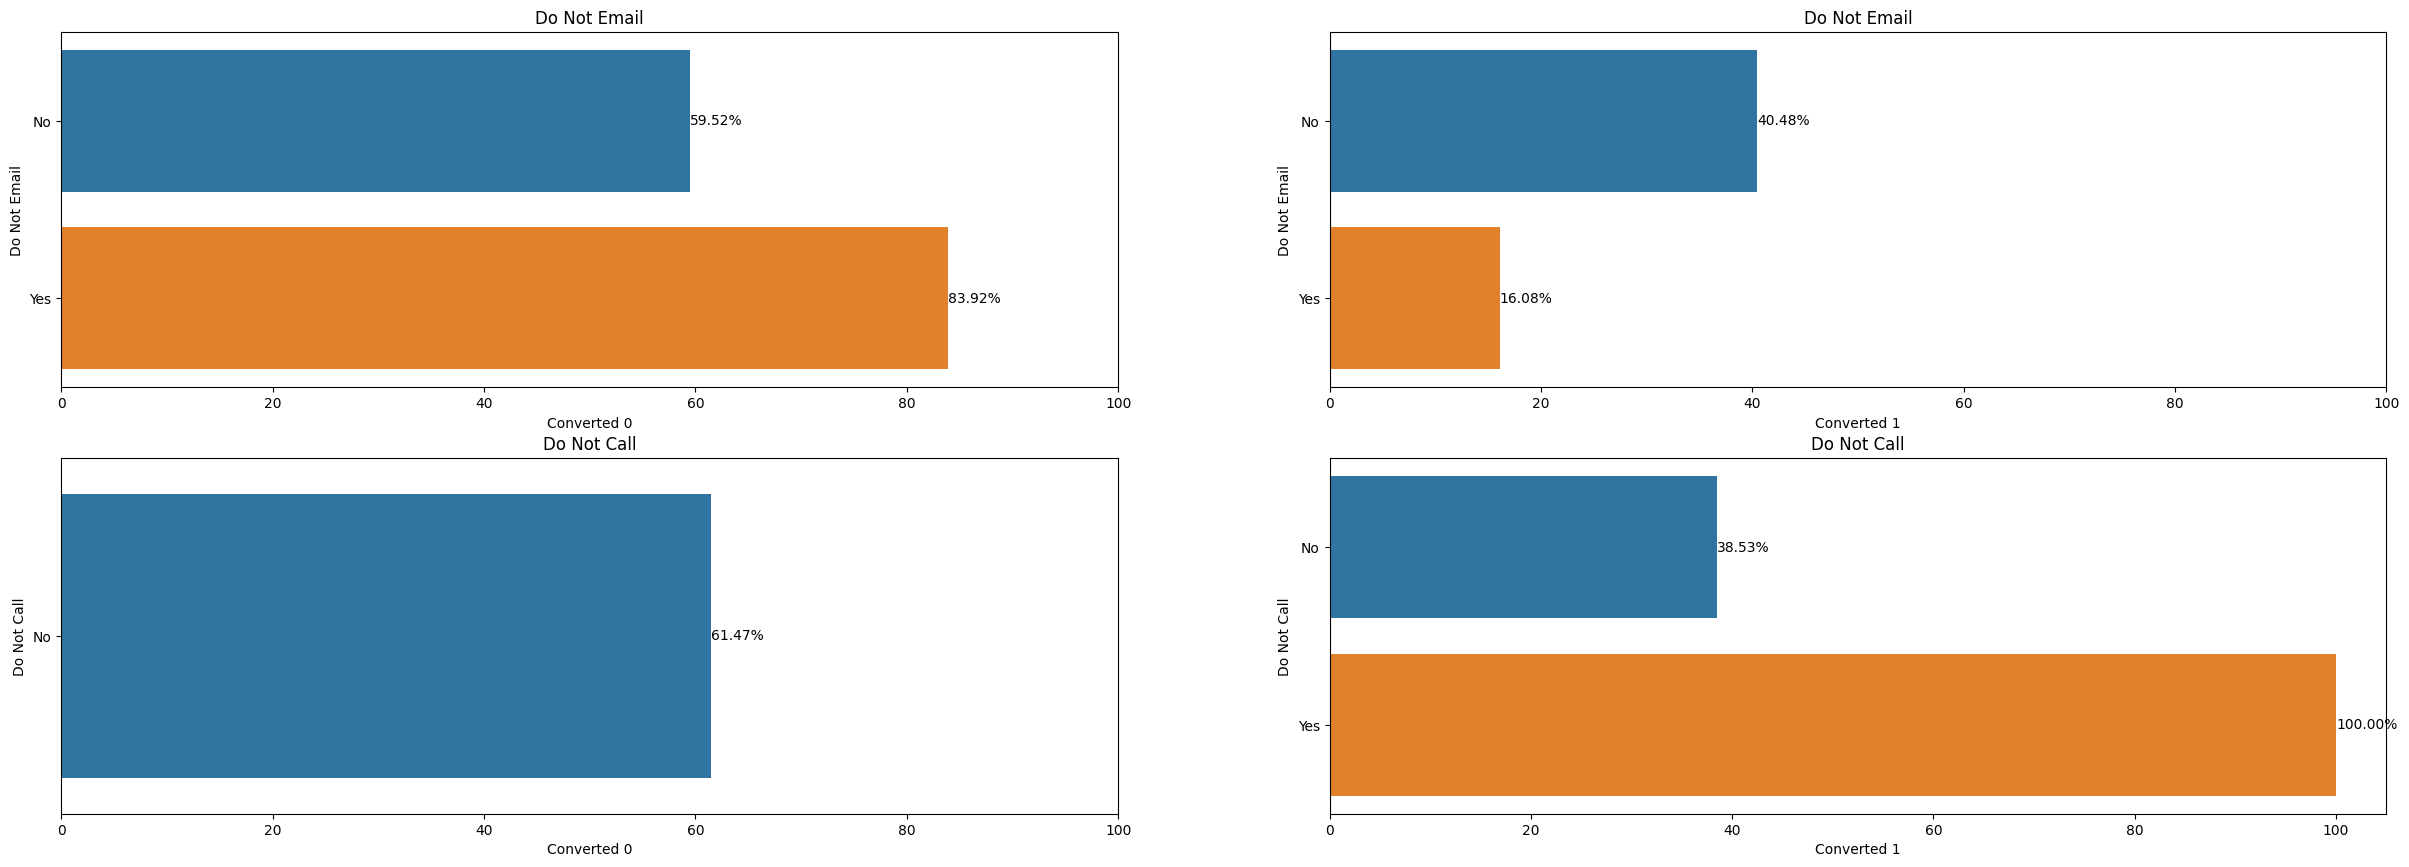

In [346]:
#Plotting a bar graph for analysing each category in the columns w.r.t Converted
plt.figure(figsize=(30,60))
for i in range(1,len(cat_cols)+1):

  x= cat_cols[i-1]
  apln_temp_df=leads_data_df.groupby([x,"Converted"]).size().reset_index(name='COUNTS')
  apln_temp_df["GRP_TOT"] = apln_temp_df.groupby(x)['COUNTS'].transform('sum')
  apln_temp_df["GRP_PCT"] = round(apln_temp_df["COUNTS"]/apln_temp_df["GRP_TOT"] * 100,2)

  plt.subplot(11,2,(2*i)-1)
  x_axis = apln_temp_df[apln_temp_df["Converted"]==0][x]
  y_axis = apln_temp_df[apln_temp_df["Converted"]==0]["GRP_PCT"]
  ax =sns.barplot(data=apln_temp_df,x=y_axis,y=x_axis)
  ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.2f}%')
  ticks = [0, 20, 40, 60,80,100]
  ax.set_xticks(ticks)
  #  plt.xticks(rotation=90)
  plt.title(x)
  plt.xlabel("Converted 0")

  plt.subplot(11,2,(2*i))
  x_axis = apln_temp_df[apln_temp_df["Converted"]==1][x]
  y_axis = apln_temp_df[apln_temp_df["Converted"]==1]["GRP_PCT"]
  ax =sns.barplot(data=apln_temp_df,x=y_axis,y=x_axis)
  ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.2f}%')
  ticks = [0, 20, 40, 60,80,100]
  ax.set_xticks(ticks)
  #  plt.xticks(rotation=90)
  plt.title(x)
  plt.xlabel("Converted 1")

**HighLights**

1. Nothing much can be deduced from "Do not call" column as most of the leads(99%) selected "No".This column can actually be dropped.
2. From "Do not email" it can be seen that leads who opted "Do not call" as "No" has better conversion rate than who opted for "Yes".

##### **'Last Activity', 'Country','City'**

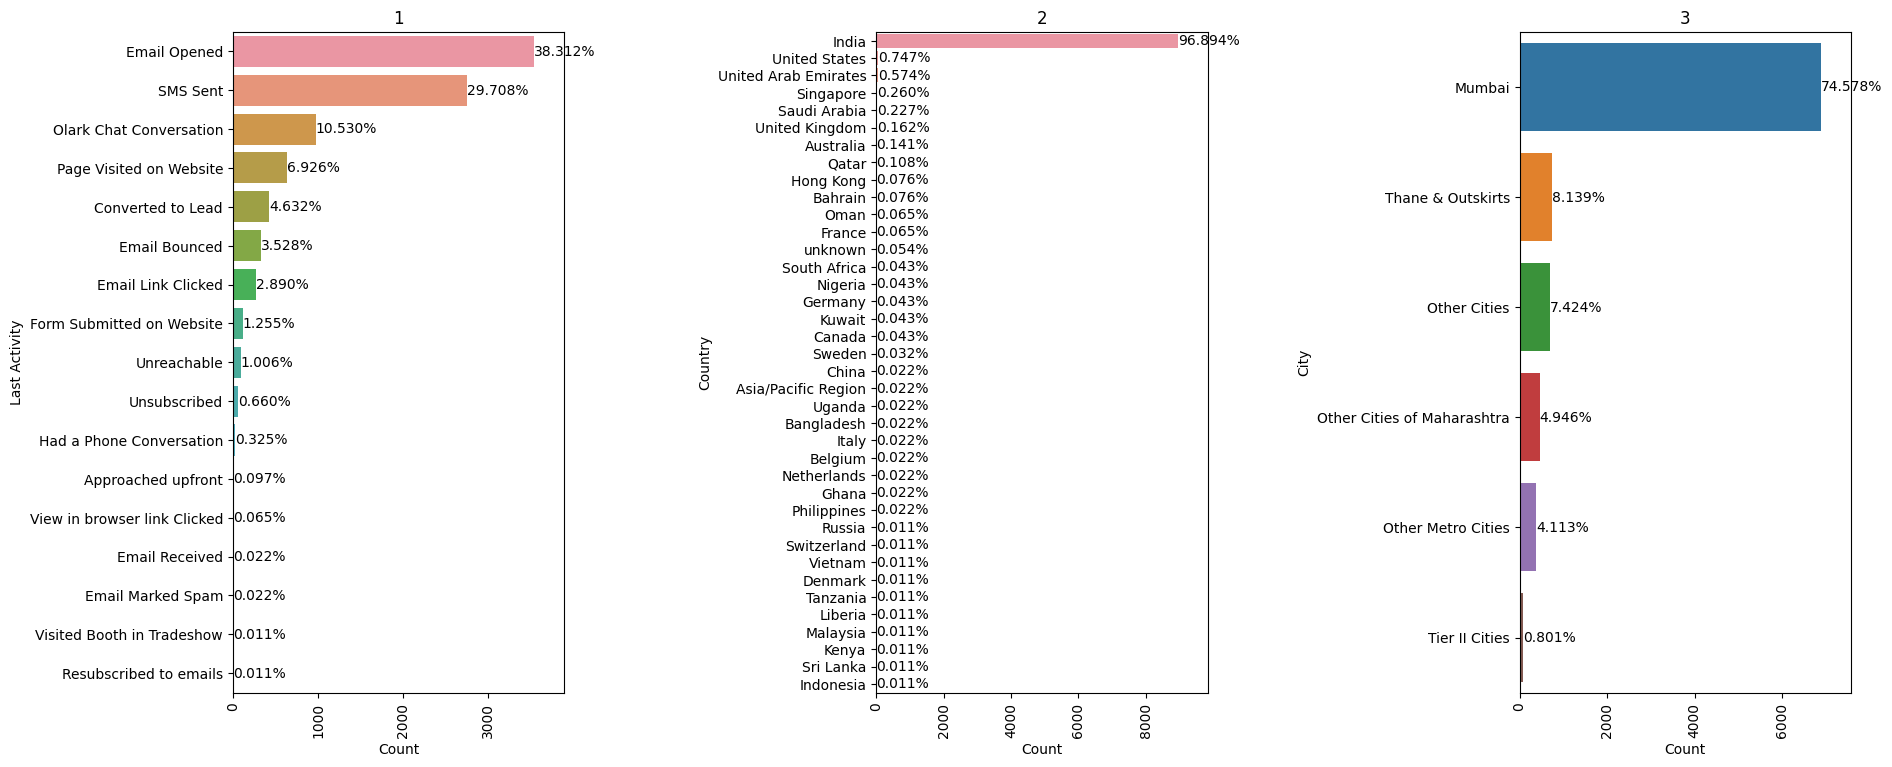

In [347]:
#Plotting a countplot graph for analysing the columns
cat_cols = ['Last Activity', 'Country','City']
plt.figure(figsize=(20,40))
for i in range(1,len(cat_cols)+1):
  x= cat_cols[i-1]
  plt.subplot(5,3,i)
  obj_plot=sns.countplot(data=leads_data_df,y=leads_data_df[x],order=leads_data_df[x].value_counts().index)
  total = leads_data_df[x].count()
  obj_plot.bar_label(obj_plot.containers[0], fmt=lambda x: f'{(x/total)*100:0.3f}%')
  obj_plot.margins(x=0.1)
  obj_plot.set(xlabel='Count', ylabel=x,title=i)
  plt.xticks(rotation=90)

plt.tight_layout(pad=5.0)
plt.show()

Both Last Activity and Country columns have categories that have very low frequencies and hence can be clubbed as Single category

In [348]:
leads_data_df['Last Activity'] = leads_data_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation',
                                                        'Approached upfront',
                                                        'View in browser link Clicked',
                                                        'Email Marked Spam',
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Other Activity')

In [349]:
leads_data_df['Country'] = leads_data_df['Country'].apply(lambda x:'Other Countries' if x!='India' else 'India')

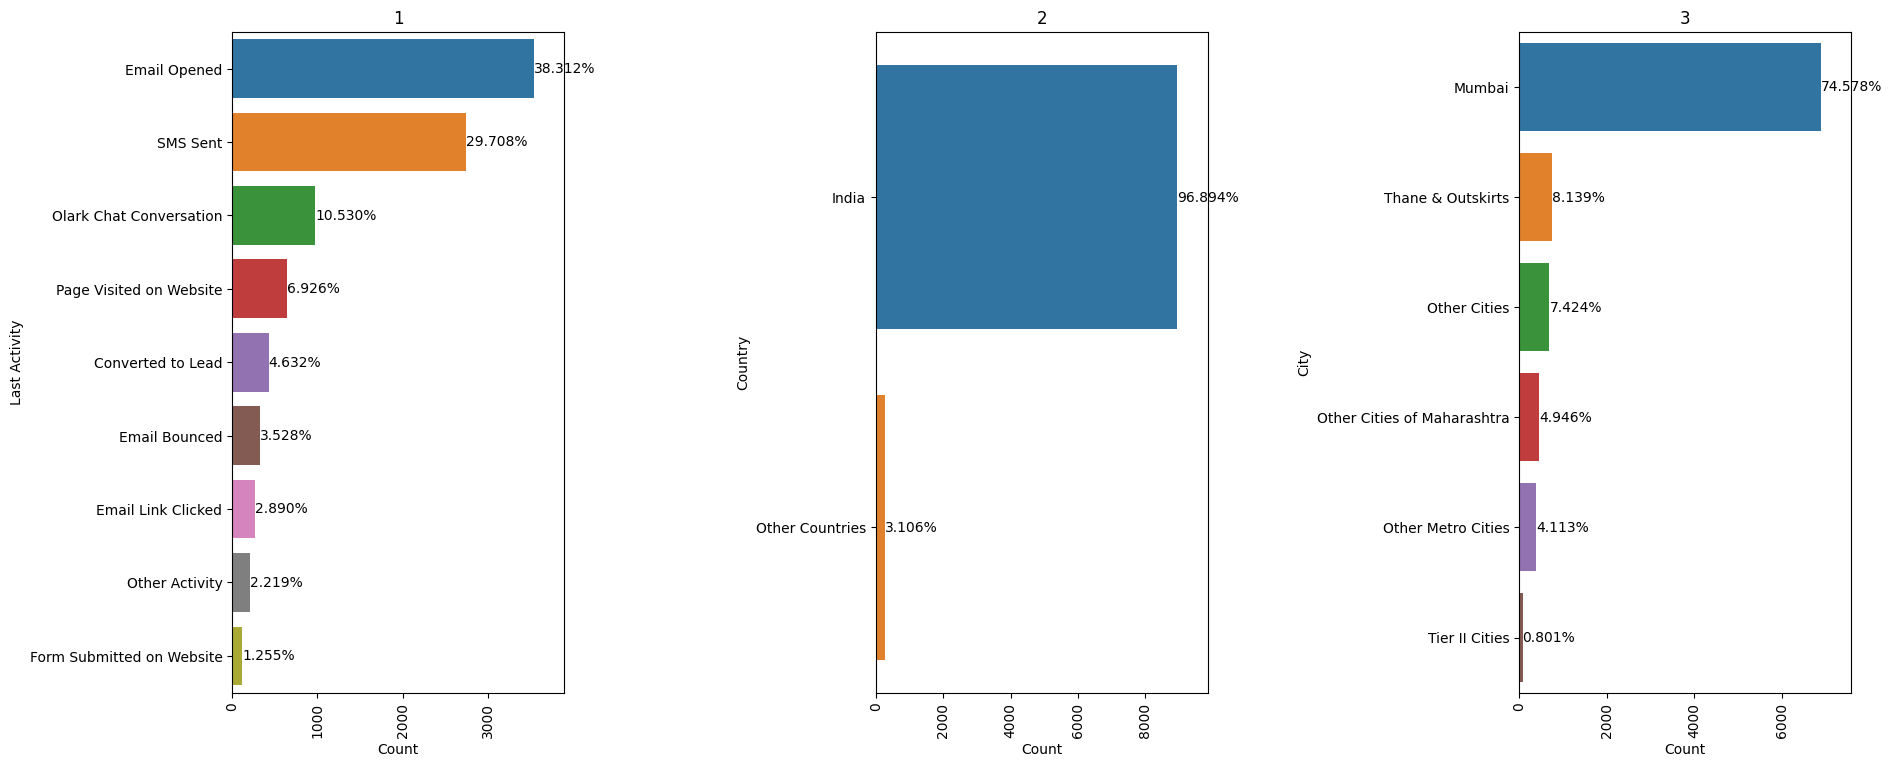

In [350]:
#RePlotting the countplot graph for analysing the columns
cat_cols = ['Last Activity', 'Country','City']
plt.figure(figsize=(20,40))
for i in range(1,len(cat_cols)+1):
  x= cat_cols[i-1]
  plt.subplot(5,3,i)
  obj_plot=sns.countplot(data=leads_data_df,y=leads_data_df[x],order=leads_data_df[x].value_counts().index)
  total = leads_data_df[x].count()
  obj_plot.bar_label(obj_plot.containers[0], fmt=lambda x: f'{(x/total)*100:0.3f}%')
  obj_plot.margins(x=0.1)
  obj_plot.set(xlabel='Count', ylabel=x,title=i)
  plt.xticks(rotation=90)

plt.tight_layout(pad=5.0)
plt.show()

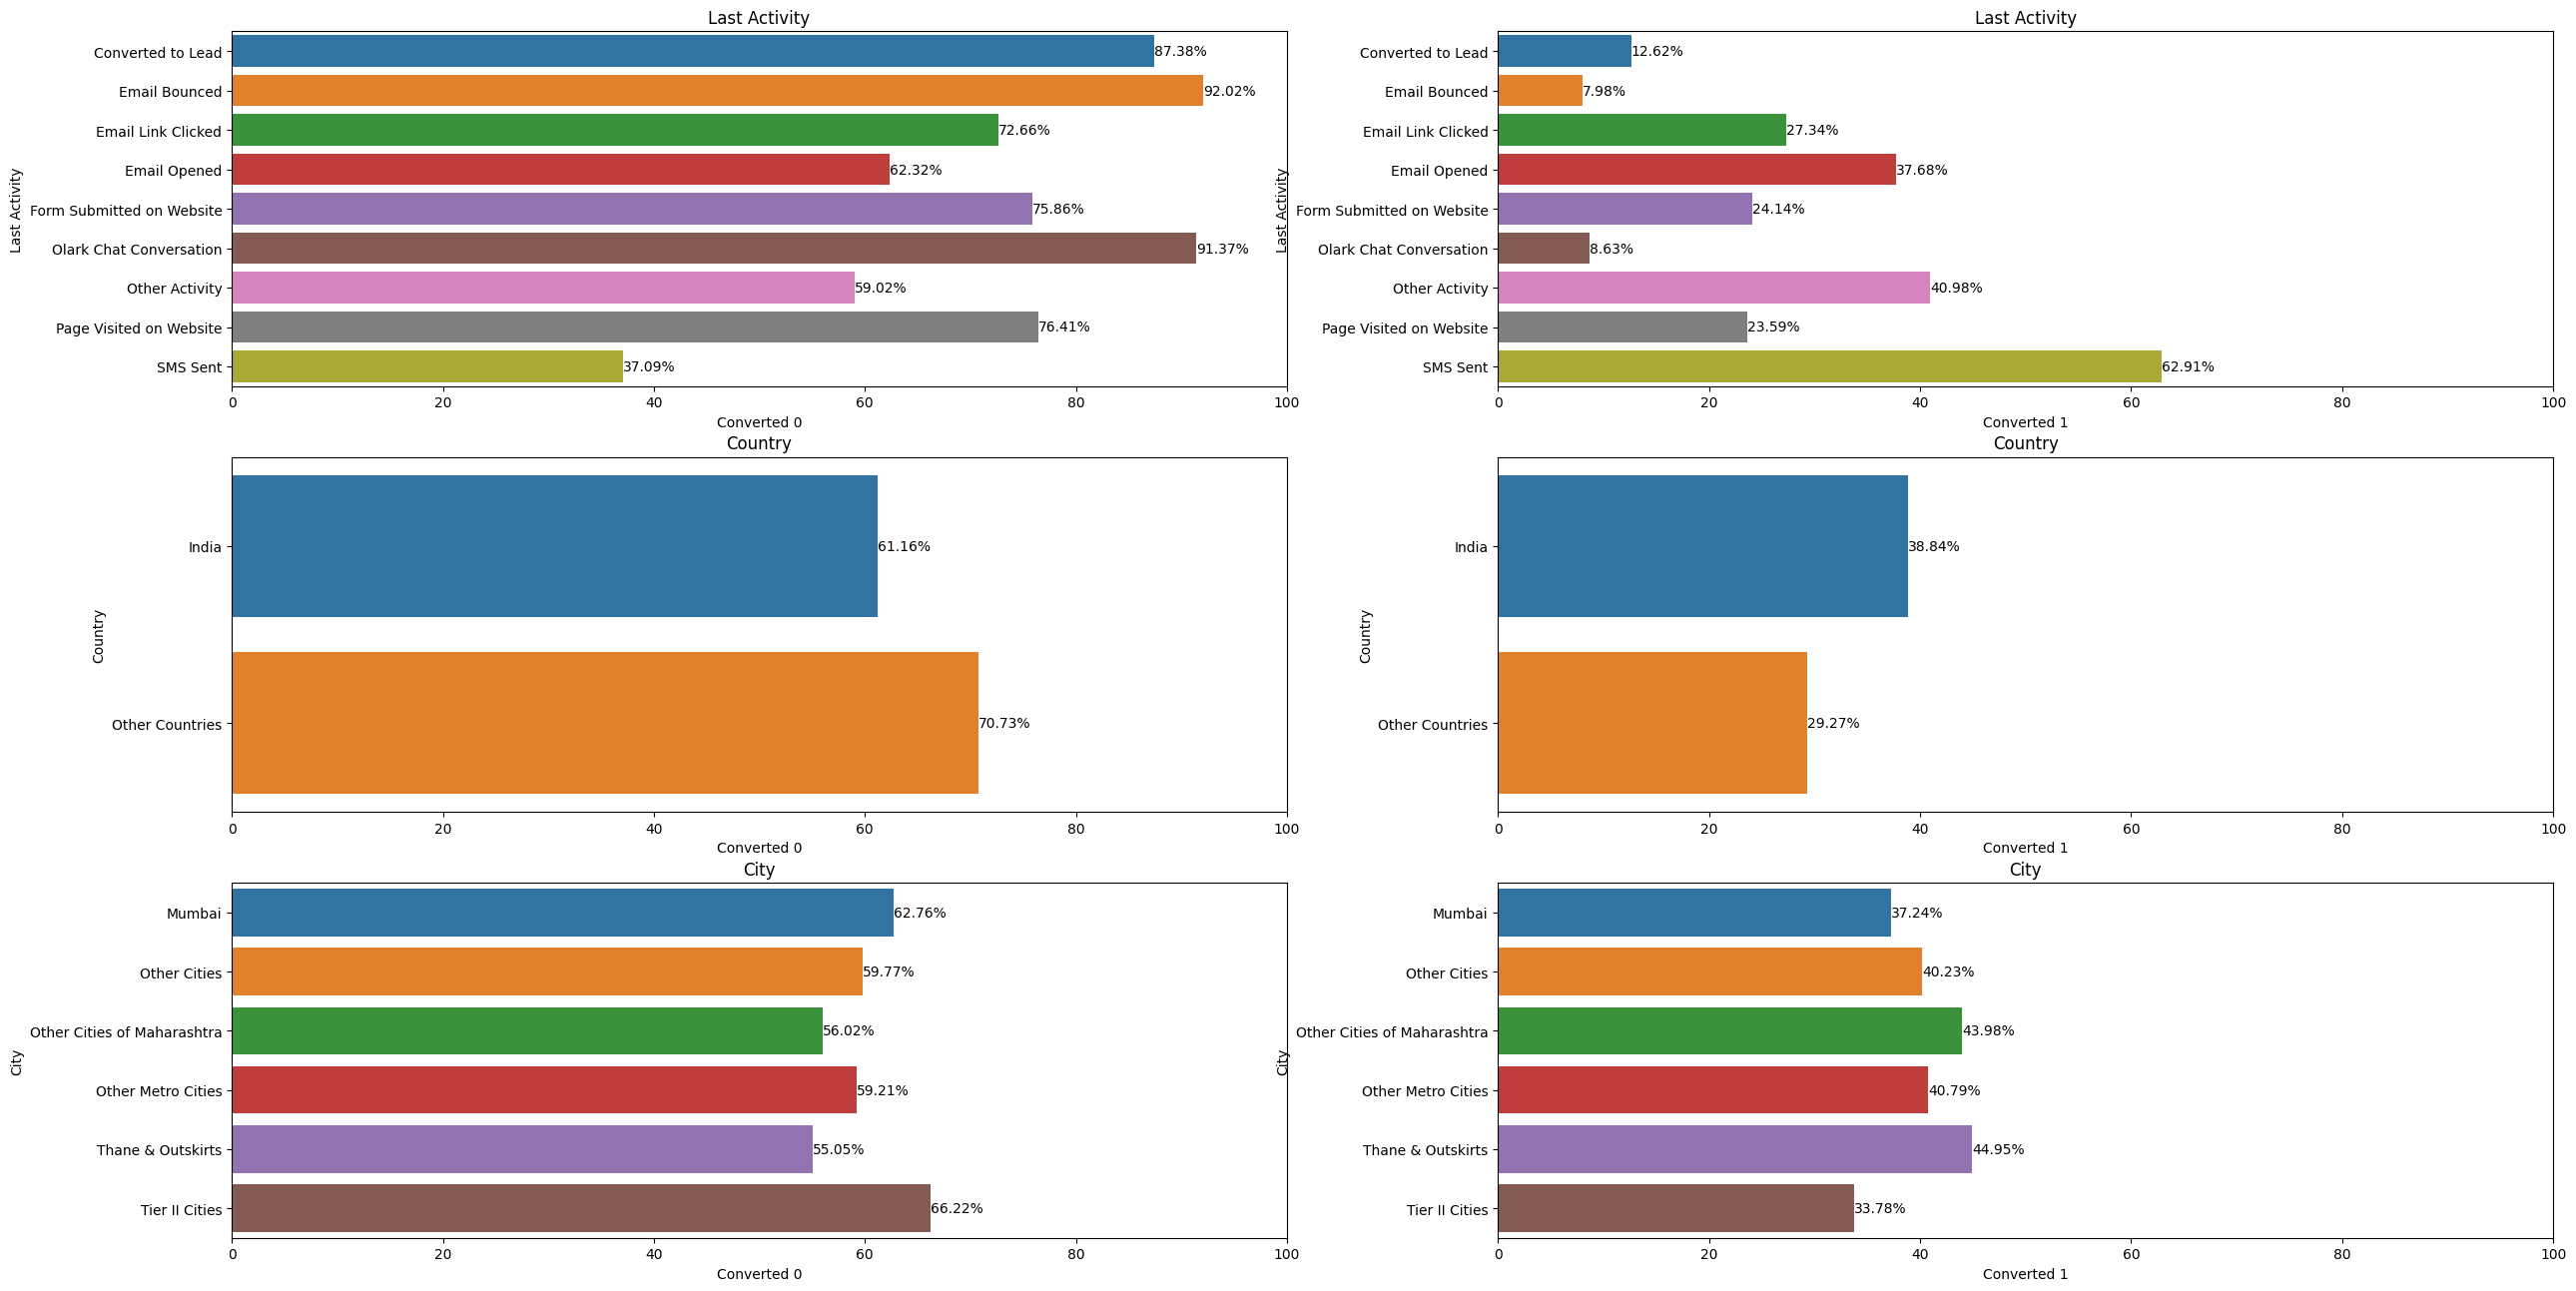

In [351]:
#Plotting a bar graph for analysing each category in the columns w.r.t Converted
plt.figure(figsize=(30,60))
for i in range(1,len(cat_cols)+1):

  x= cat_cols[i-1]
  apln_temp_df=leads_data_df.groupby([x,"Converted"]).size().reset_index(name='COUNTS')
  apln_temp_df["GRP_TOT"] = apln_temp_df.groupby(x)['COUNTS'].transform('sum')
  apln_temp_df["GRP_PCT"] = round(apln_temp_df["COUNTS"]/apln_temp_df["GRP_TOT"] * 100,2)

  plt.subplot(11,2,(2*i)-1)
  x_axis = apln_temp_df[apln_temp_df["Converted"]==0][x]
  y_axis = apln_temp_df[apln_temp_df["Converted"]==0]["GRP_PCT"]
  ax =sns.barplot(data=apln_temp_df,x=y_axis,y=x_axis)
  ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.2f}%')
  ticks = [0, 20, 40, 60,80,100]
  ax.set_xticks(ticks)
  #  plt.xticks(rotation=90)
  plt.title(x)
  plt.xlabel("Converted 0")

  plt.subplot(11,2,(2*i))
  x_axis = apln_temp_df[apln_temp_df["Converted"]==1][x]
  y_axis = apln_temp_df[apln_temp_df["Converted"]==1]["GRP_PCT"]
  ax =sns.barplot(data=apln_temp_df,x=y_axis,y=x_axis)
  ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.2f}%')
  ticks = [0, 20, 40, 60,80,100]
  ax.set_xticks(ticks)
  #  plt.xticks(rotation=90)
  plt.title(x)
  plt.xlabel("Converted 1")

**Highlights**

1. The Country coloumn seems to be too imbalanced and can be dropped from our analysis.
2. The "Last Activity" "SMS Sent" have a good lead counts and good conversion rate as well.
3. Though Leads with "Last Activity" "Email Opened" are high their conversion rate is not that good(only 37%)
4. Also, Leads with "Last Activity" "Email Opened" are good but their conversion rate is just 8%.
5. Leads count from "Mumbai" is very much higher than other cities , however the conversion rate is similar in all cities , ranging between 33% to 45%.So nothing much can be inferred from this column and it can be dropped




##### **'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course'**

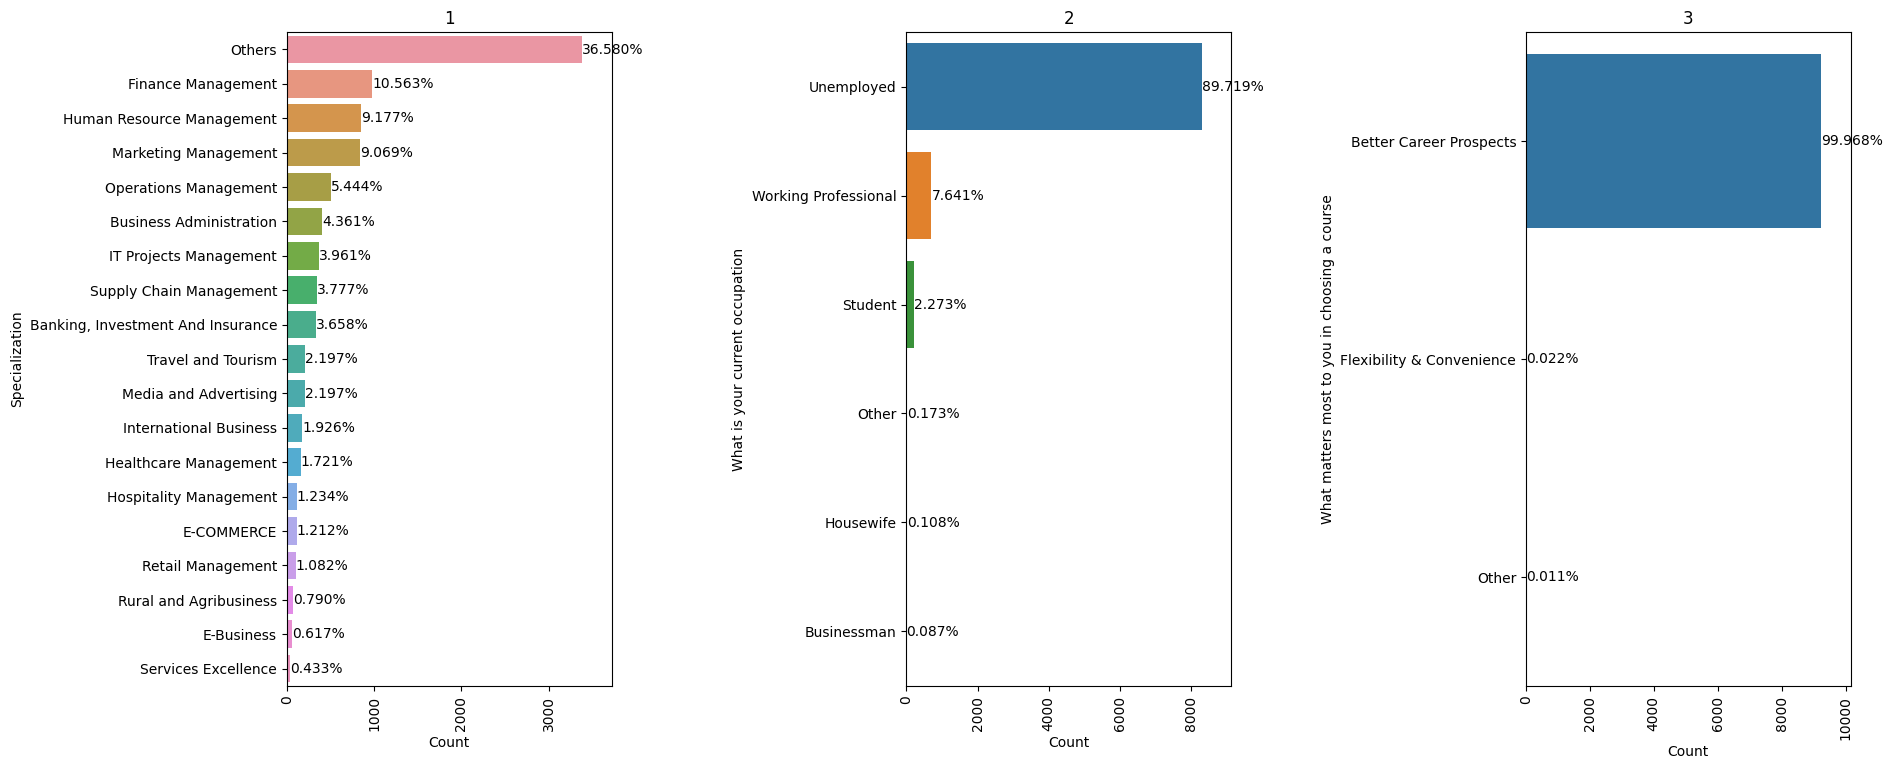

In [352]:
#Plotting the countplot graph for analysing the columns
cat_cols = ['Specialization', 'What is your current occupation', 'What matters most to you in choosing a course']
plt.figure(figsize=(20,40))
for i in range(1,len(cat_cols)+1):
  x= cat_cols[i-1]
  plt.subplot(5,3,i)
  obj_plot=sns.countplot(data=leads_data_df,y=leads_data_df[x],order=leads_data_df[x].value_counts().index)
  total = leads_data_df[x].count()
  obj_plot.bar_label(obj_plot.containers[0], fmt=lambda x: f'{(x/total)*100:0.3f}%')
  obj_plot.margins(x=0.1)
  obj_plot.set(xlabel='Count', ylabel=x,title=i)
  plt.xticks(rotation=90)

plt.tight_layout(pad=5.0)
plt.show()

Combining all Management Specializations into single category

In [353]:
leads_data_df['Specialization'] = leads_data_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')

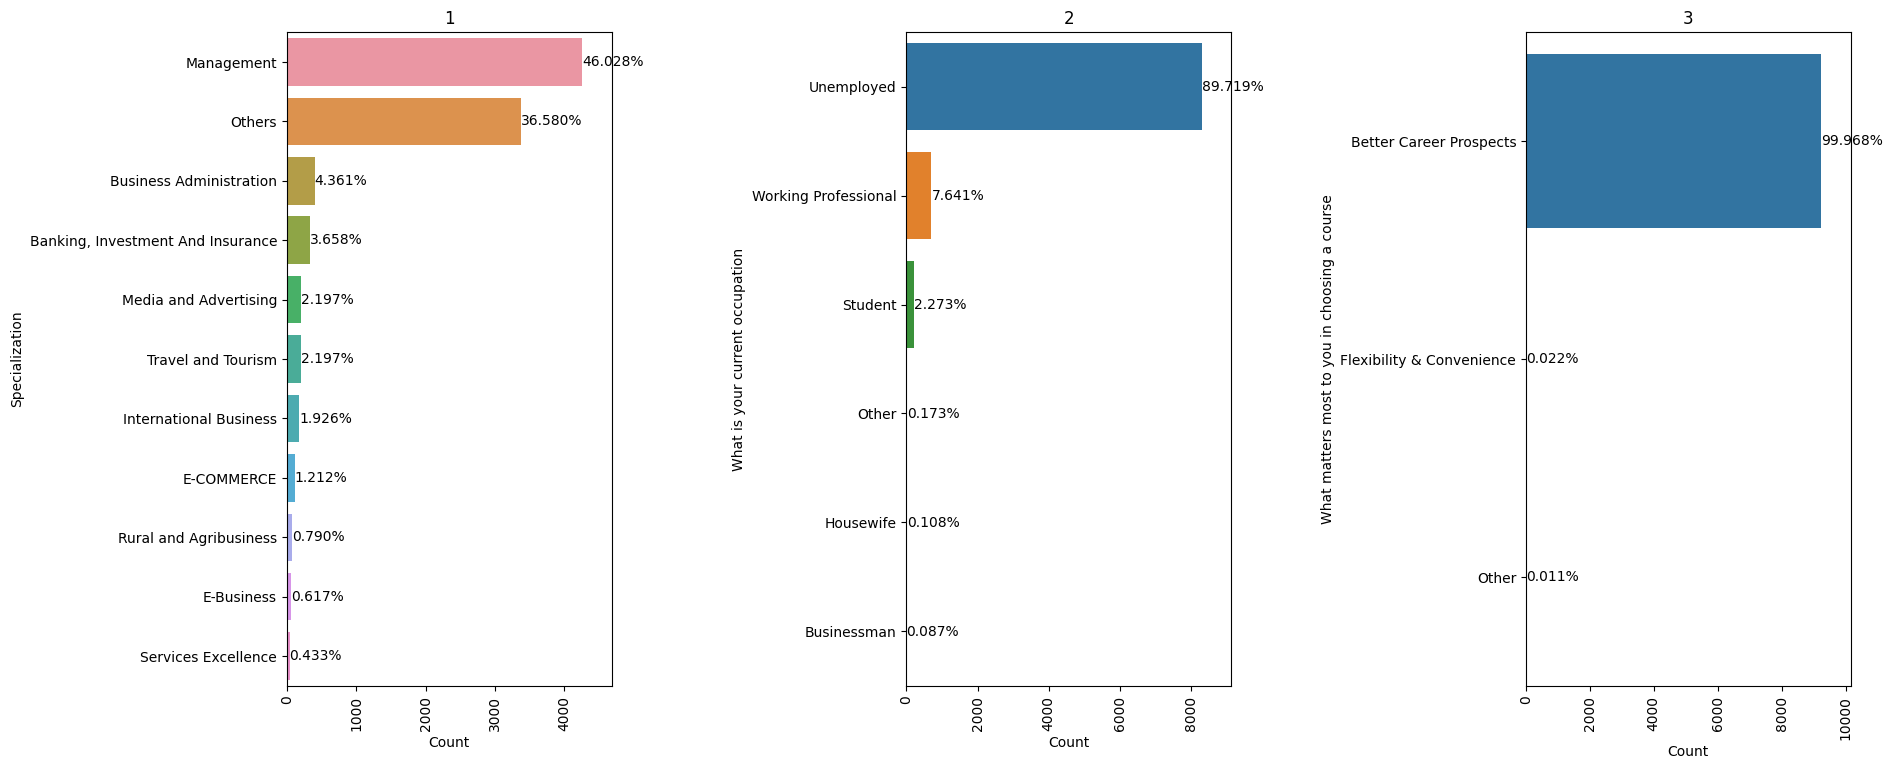

In [354]:
#RePlotting the countplot graph for analysing the columns
cat_cols = ['Specialization', 'What is your current occupation', 'What matters most to you in choosing a course',]
plt.figure(figsize=(20,40))
for i in range(1,len(cat_cols)+1):
  x= cat_cols[i-1]
  plt.subplot(5,3,i)
  obj_plot=sns.countplot(data=leads_data_df,y=leads_data_df[x],order=leads_data_df[x].value_counts().index)
  total = leads_data_df[x].count()
  obj_plot.bar_label(obj_plot.containers[0], fmt=lambda x: f'{(x/total)*100:0.3f}%')
  obj_plot.margins(x=0.1)
  obj_plot.set(xlabel='Count', ylabel=x,title=i)
  plt.xticks(rotation=90)

plt.tight_layout(pad=5.0)
plt.show()

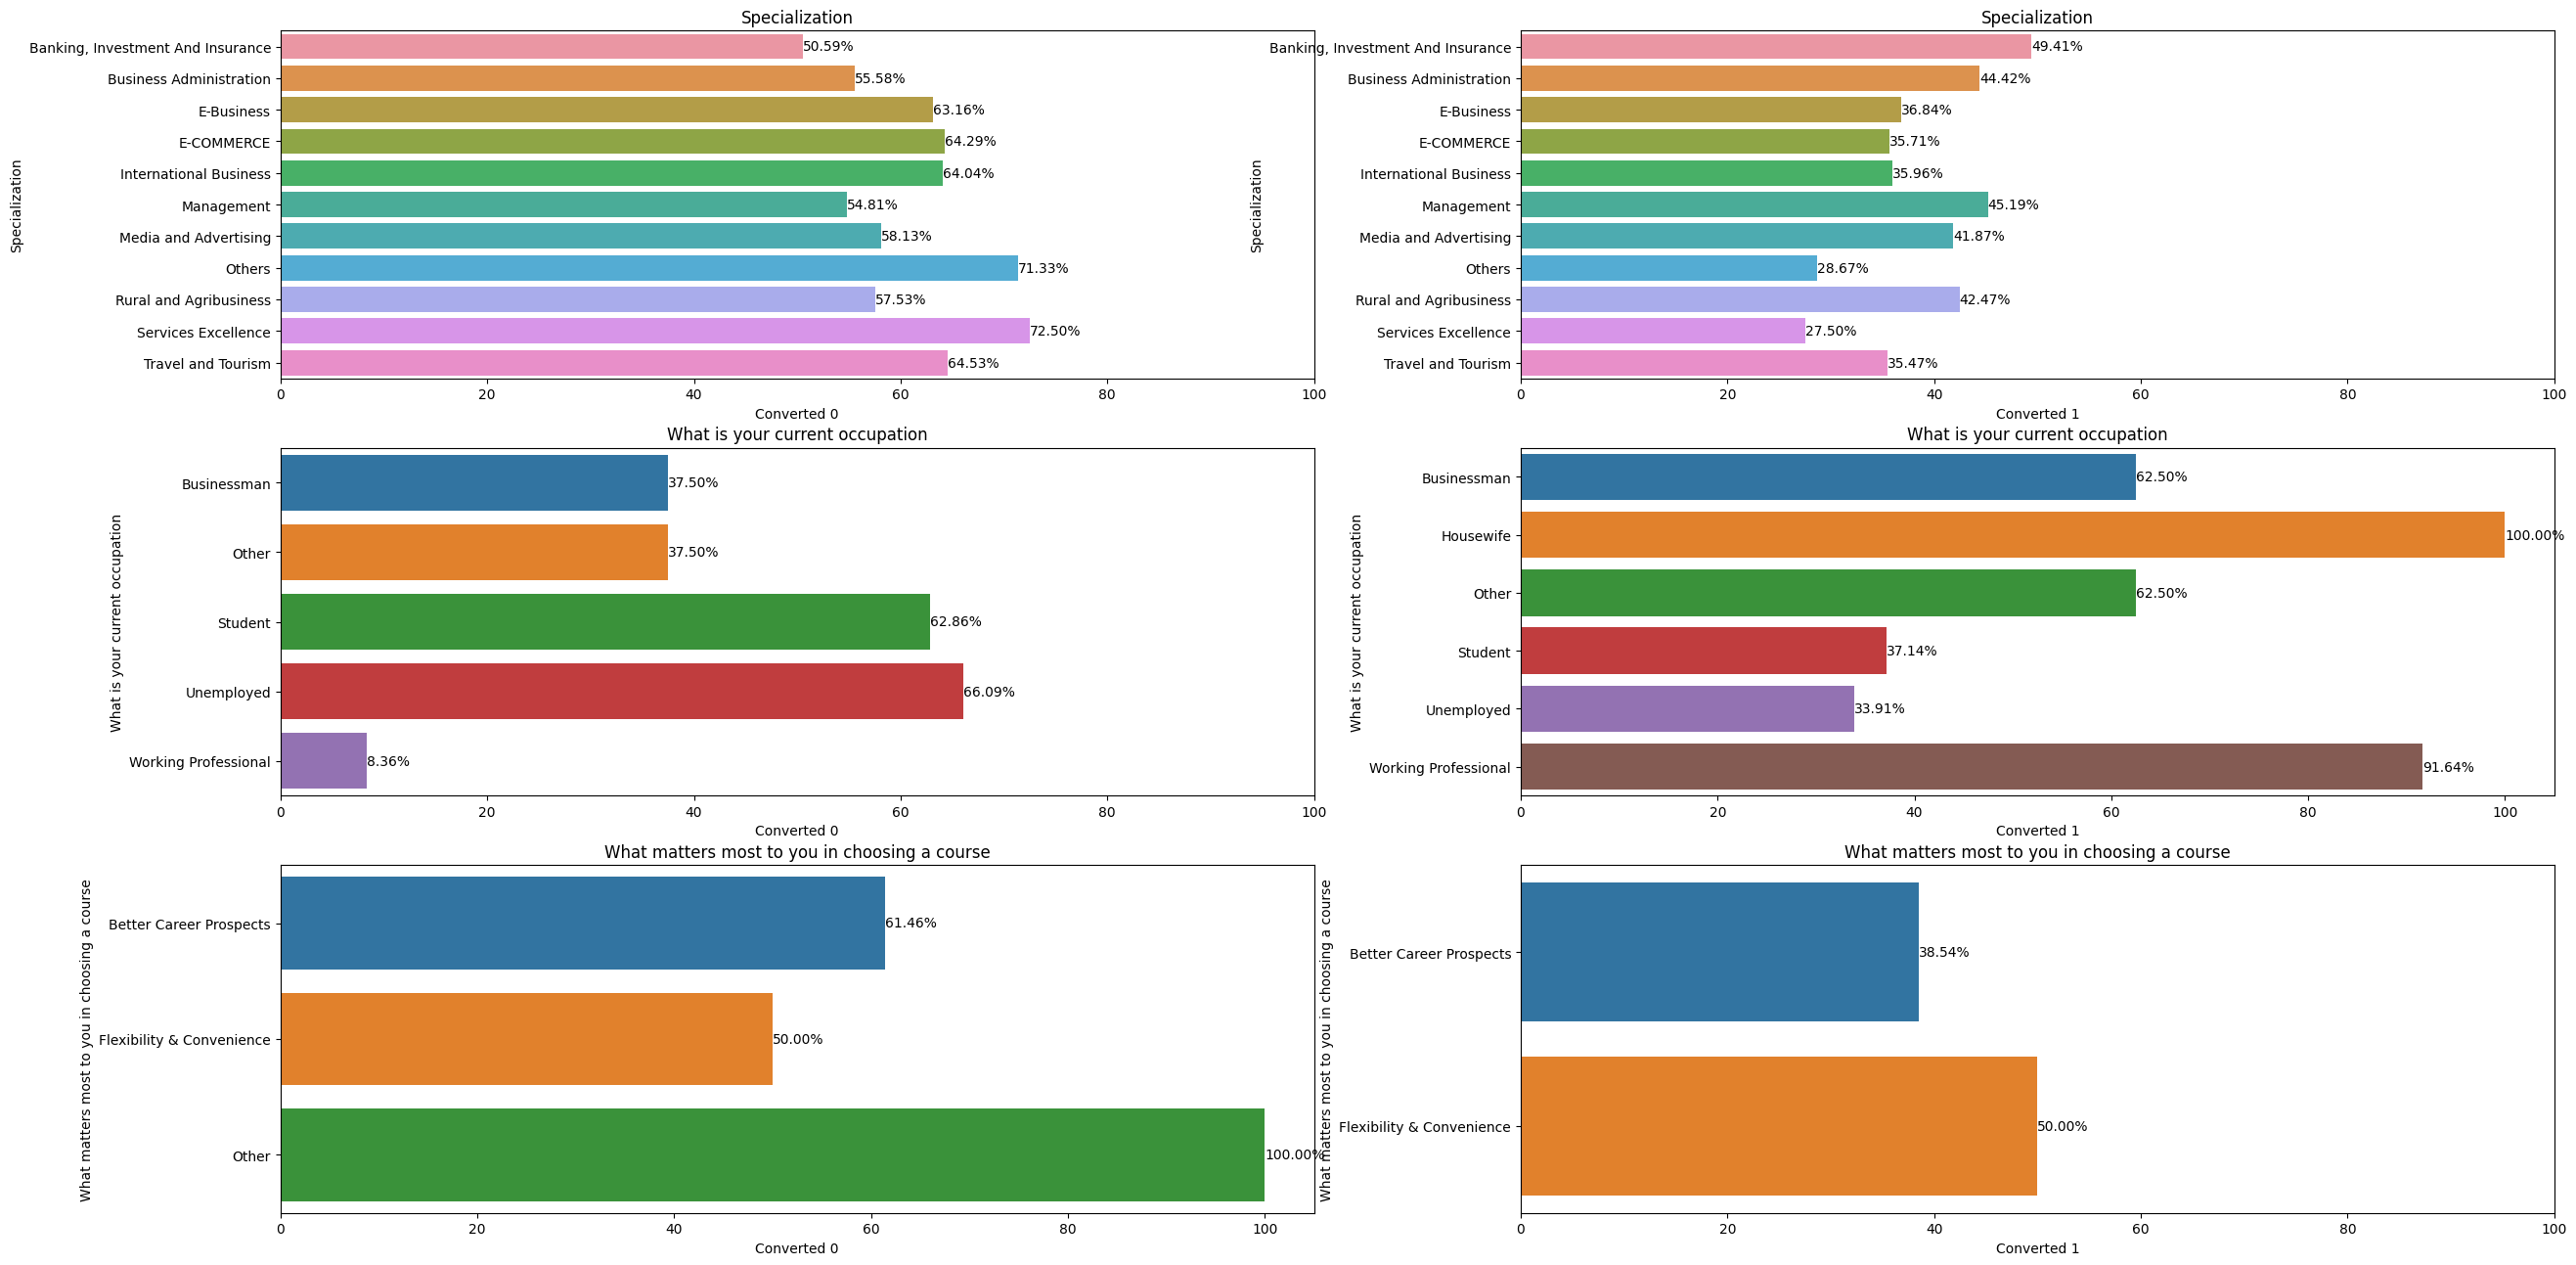

In [355]:
#Plotting a bar graph for analysing each category in the columns w.r.t Converted
plt.figure(figsize=(30,60))
for i in range(1,len(cat_cols)+1):

  x= cat_cols[i-1]
  apln_temp_df=leads_data_df.groupby([x,"Converted"]).size().reset_index(name='COUNTS')
  apln_temp_df["GRP_TOT"] = apln_temp_df.groupby(x)['COUNTS'].transform('sum')
  apln_temp_df["GRP_PCT"] = round(apln_temp_df["COUNTS"]/apln_temp_df["GRP_TOT"] * 100,2)

  plt.subplot(11,2,(2*i)-1)
  x_axis = apln_temp_df[apln_temp_df["Converted"]==0][x]
  y_axis = apln_temp_df[apln_temp_df["Converted"]==0]["GRP_PCT"]
  ax =sns.barplot(data=apln_temp_df,x=y_axis,y=x_axis)
  ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.2f}%')
  ticks = [0, 20, 40, 60,80,100]
  ax.set_xticks(ticks)
  #  plt.xticks(rotation=90)
  plt.title(x)
  plt.xlabel("Converted 0")

  plt.subplot(11,2,(2*i))
  x_axis = apln_temp_df[apln_temp_df["Converted"]==1][x]
  y_axis = apln_temp_df[apln_temp_df["Converted"]==1]["GRP_PCT"]
  ax =sns.barplot(data=apln_temp_df,x=y_axis,y=x_axis)
  ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.2f}%')
  ticks = [0, 20, 40, 60,80,100]
  ax.set_xticks(ticks)
  #  plt.xticks(rotation=90)
  plt.title(x)
  plt.xlabel("Converted 1")

**Highlights**

1. The Column "What matters most to you in choosing a course" can be dropped as it is showing almost zero variance.
2. From the Column "'What is your current occupation", it can be seen that the conversion rate of "working professionals" is better than others.
3. The conversion rates of specialiation is similar for all categories with leads from "Banking,Investment and Insurance" having a better edge over others.

##### **'Search',  'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'**

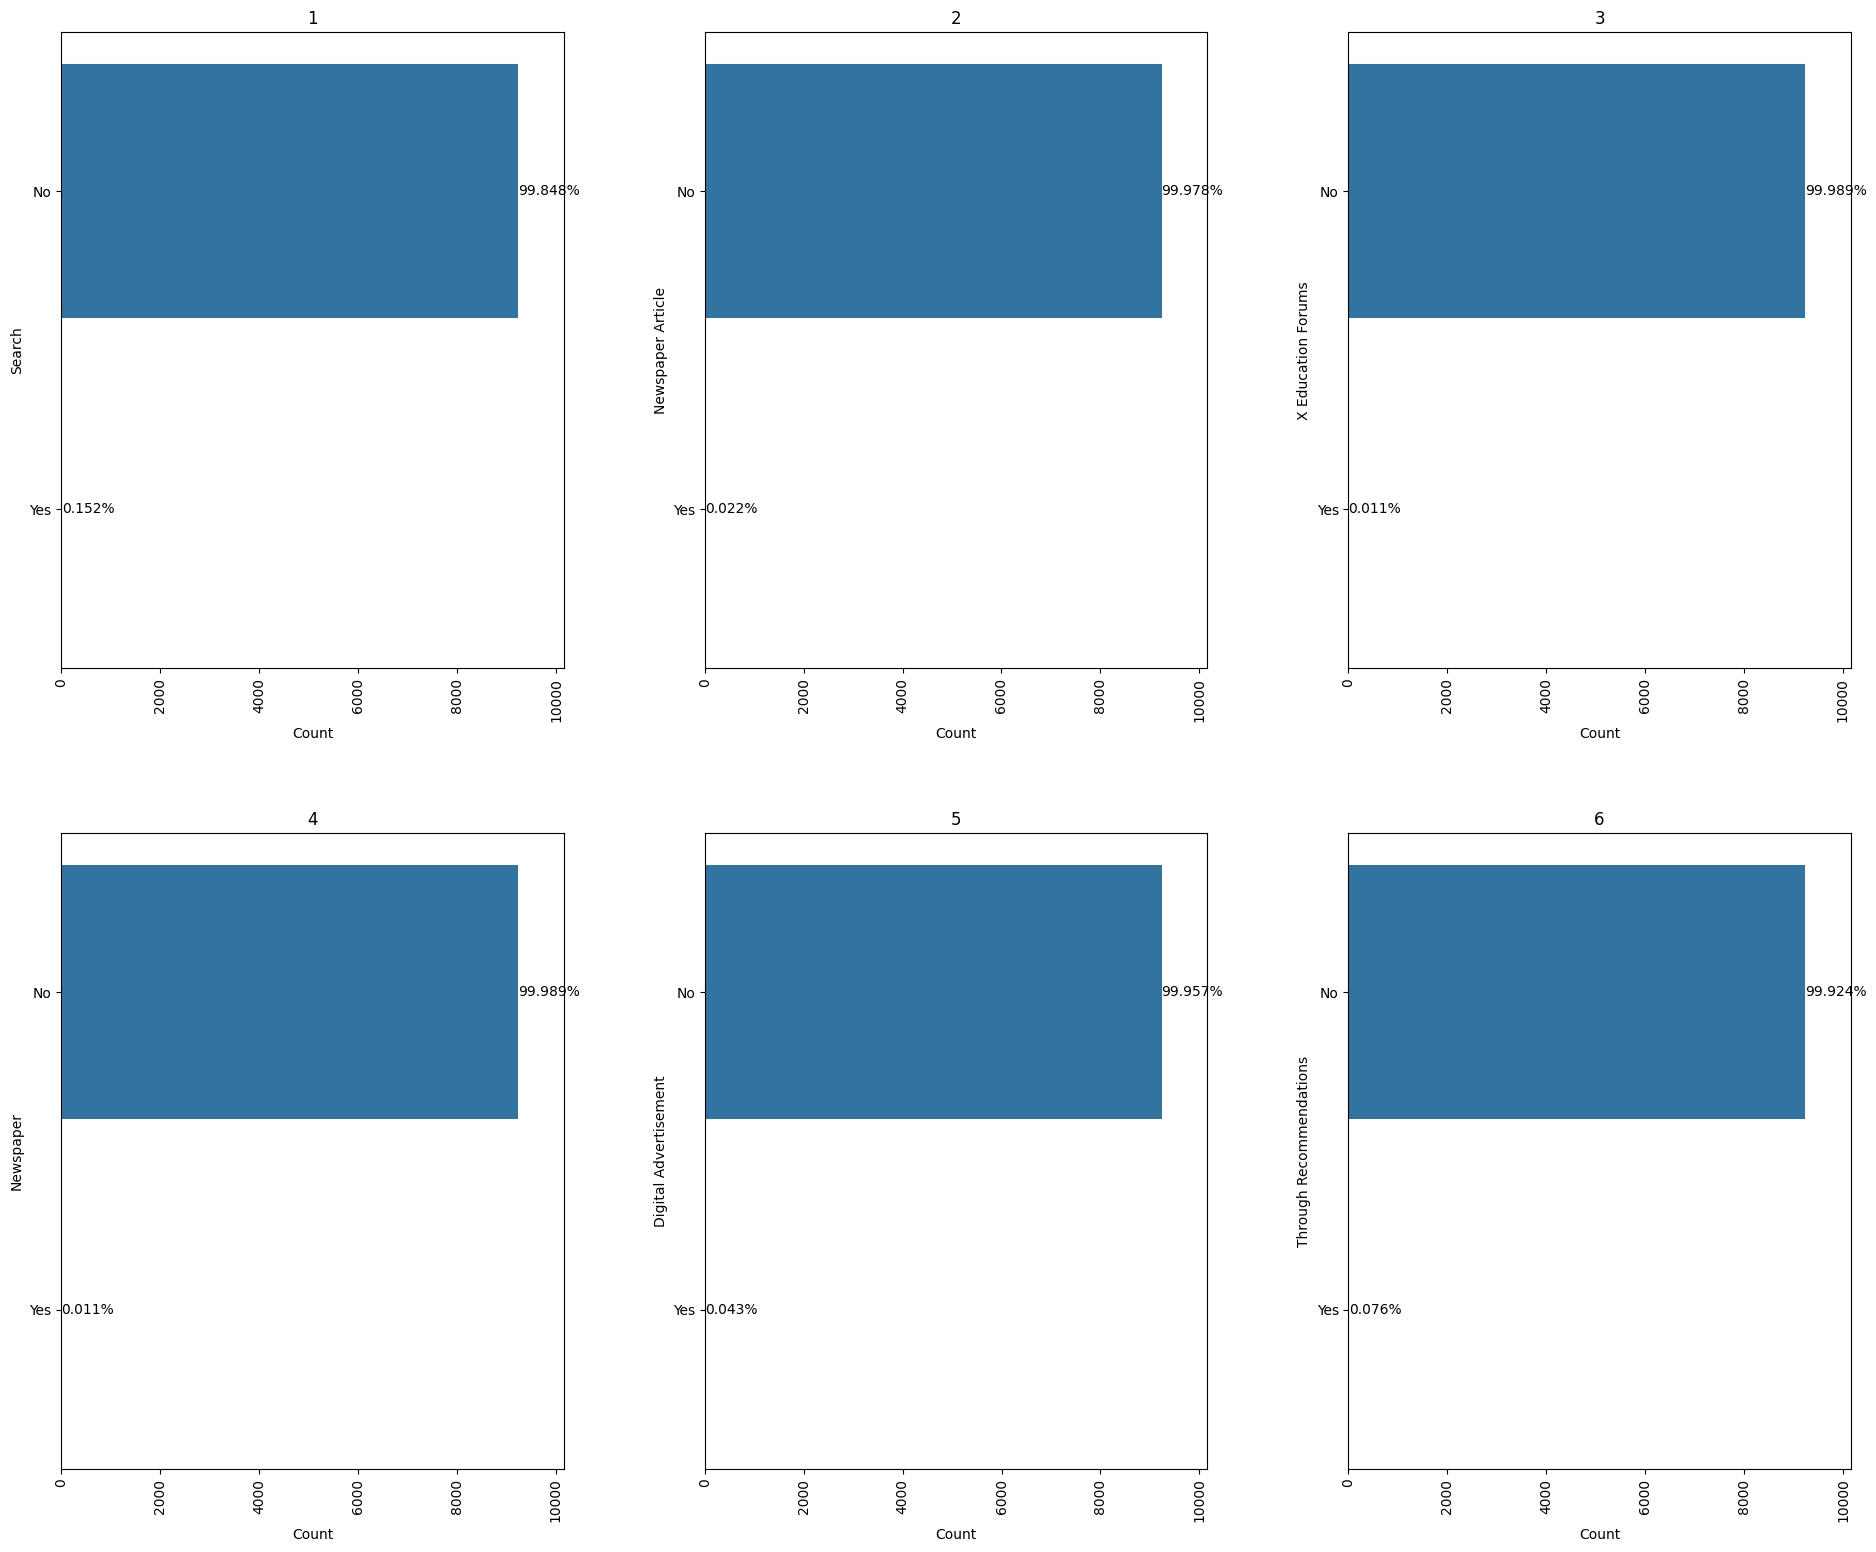

In [356]:
#Plotting the countplot graph for analysing the columns
cat_cols = ['Search',  'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',]
plt.figure(figsize=(20,40))
for i in range(1,len(cat_cols)+1):
  x= cat_cols[i-1]
  plt.subplot(5,3,i)
  obj_plot=sns.countplot(data=leads_data_df,y=leads_data_df[x],order=leads_data_df[x].value_counts().index)
  total = leads_data_df[x].count()
  obj_plot.bar_label(obj_plot.containers[0], fmt=lambda x: f'{(x/total)*100:0.3f}%')
  obj_plot.margins(x=0.1)
  obj_plot.set(xlabel='Count', ylabel=x,title=i)
  plt.xticks(rotation=90)

plt.tight_layout(pad=5.0)
plt.show()

**Highlihgts**
1. All these columns can be dropped as they are showing almost zero variance

##### **'Tags', 'A free copy of Mastering The Interview', 'Last Notable Activity'**

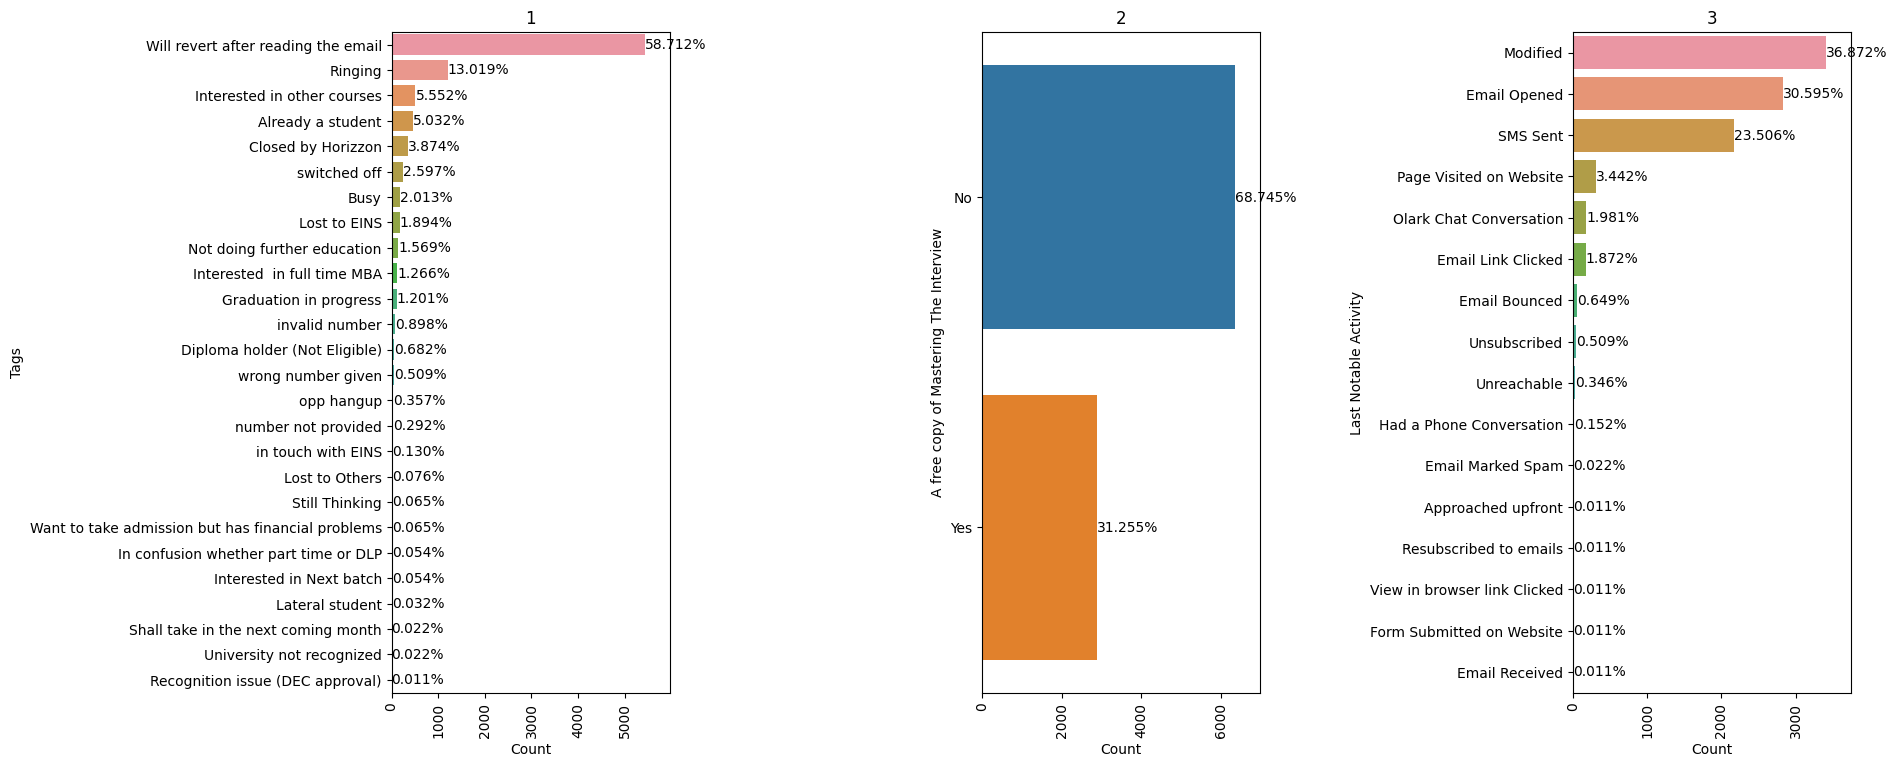

In [357]:
#Plotting the countplot graph for analysing the columns
cat_cols = ['Tags', 'A free copy of Mastering The Interview', 'Last Notable Activity']
plt.figure(figsize=(20,40))
for i in range(1,len(cat_cols)+1):
  x= cat_cols[i-1]
  plt.subplot(5,3,i)
  obj_plot=sns.countplot(data=leads_data_df,y=leads_data_df[x],order=leads_data_df[x].value_counts().index)
  total = leads_data_df[x].count()
  obj_plot.bar_label(obj_plot.containers[0], fmt=lambda x: f'{(x/total)*100:0.3f}%')
  obj_plot.margins(x=0.1)
  obj_plot.set(xlabel='Count', ylabel=x,title=i)
  plt.xticks(rotation=90)

plt.tight_layout(pad=5.0)
plt.show()

Tags and Last Notable Activity columns have categories that have very low frequencies and hence can be clubbed as Single category

In [358]:
leads_data_df['Tags'] = leads_data_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

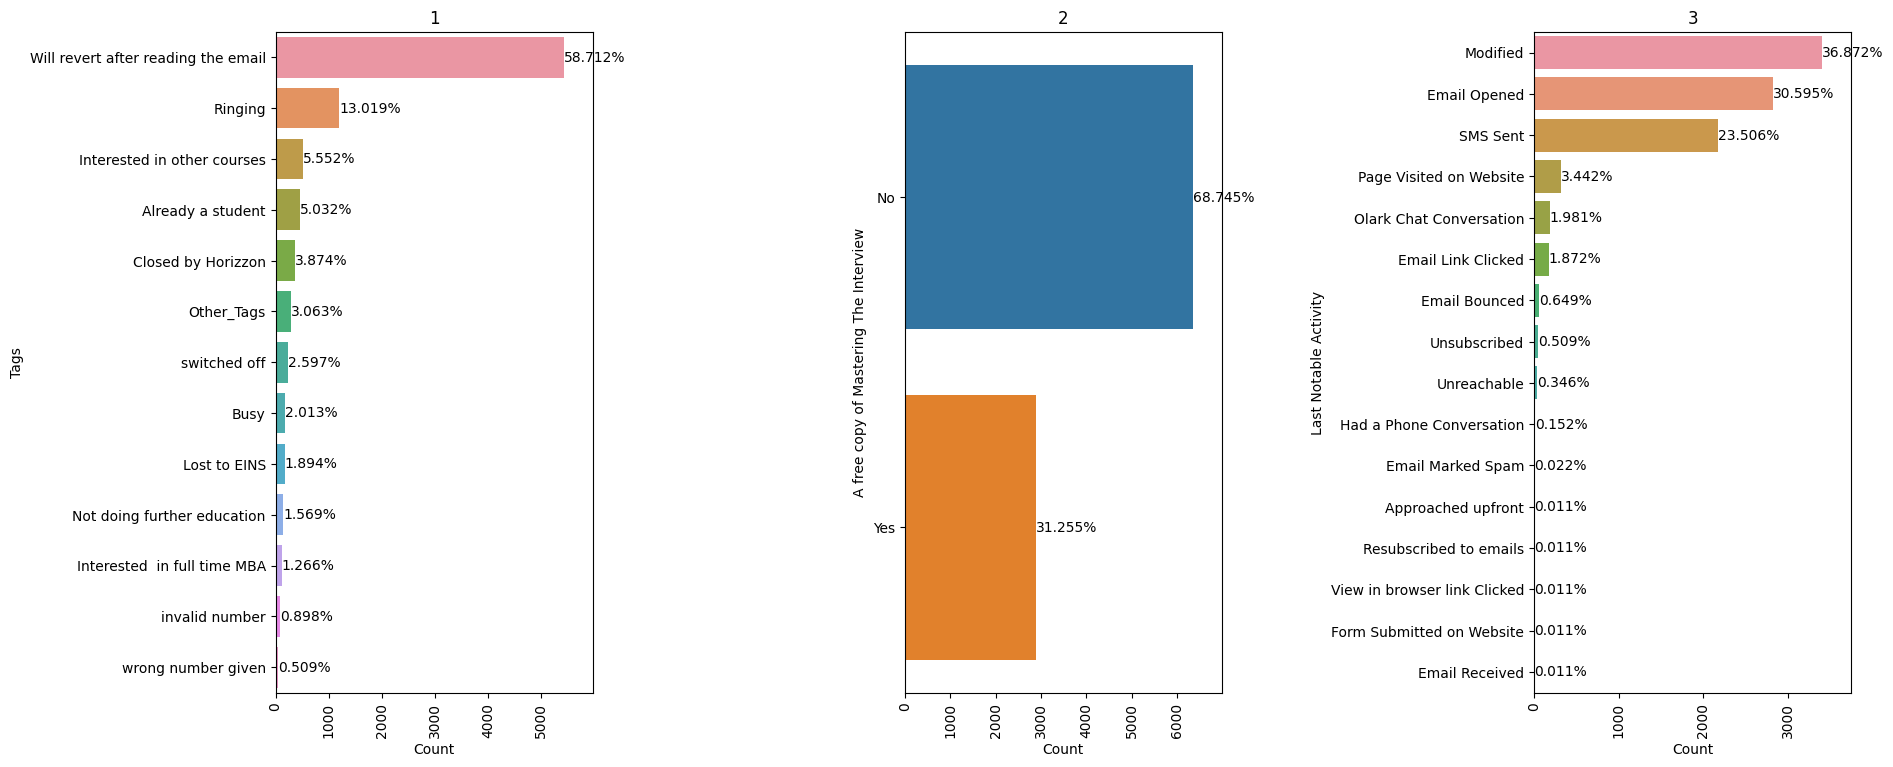

In [359]:
#RePlotting the countplot graph for analysing the columns
cat_cols = ['Tags', 'A free copy of Mastering The Interview', 'Last Notable Activity']
plt.figure(figsize=(20,40))
for i in range(1,len(cat_cols)+1):
  x= cat_cols[i-1]
  plt.subplot(5,3,i)
  obj_plot=sns.countplot(data=leads_data_df,y=leads_data_df[x],order=leads_data_df[x].value_counts().index)
  total = leads_data_df[x].count()
  obj_plot.bar_label(obj_plot.containers[0], fmt=lambda x: f'{(x/total)*100:0.3f}%')
  obj_plot.margins(x=0.1)
  obj_plot.set(xlabel='Count', ylabel=x,title=i)
  plt.xticks(rotation=90)

plt.tight_layout(pad=5.0)
plt.show()

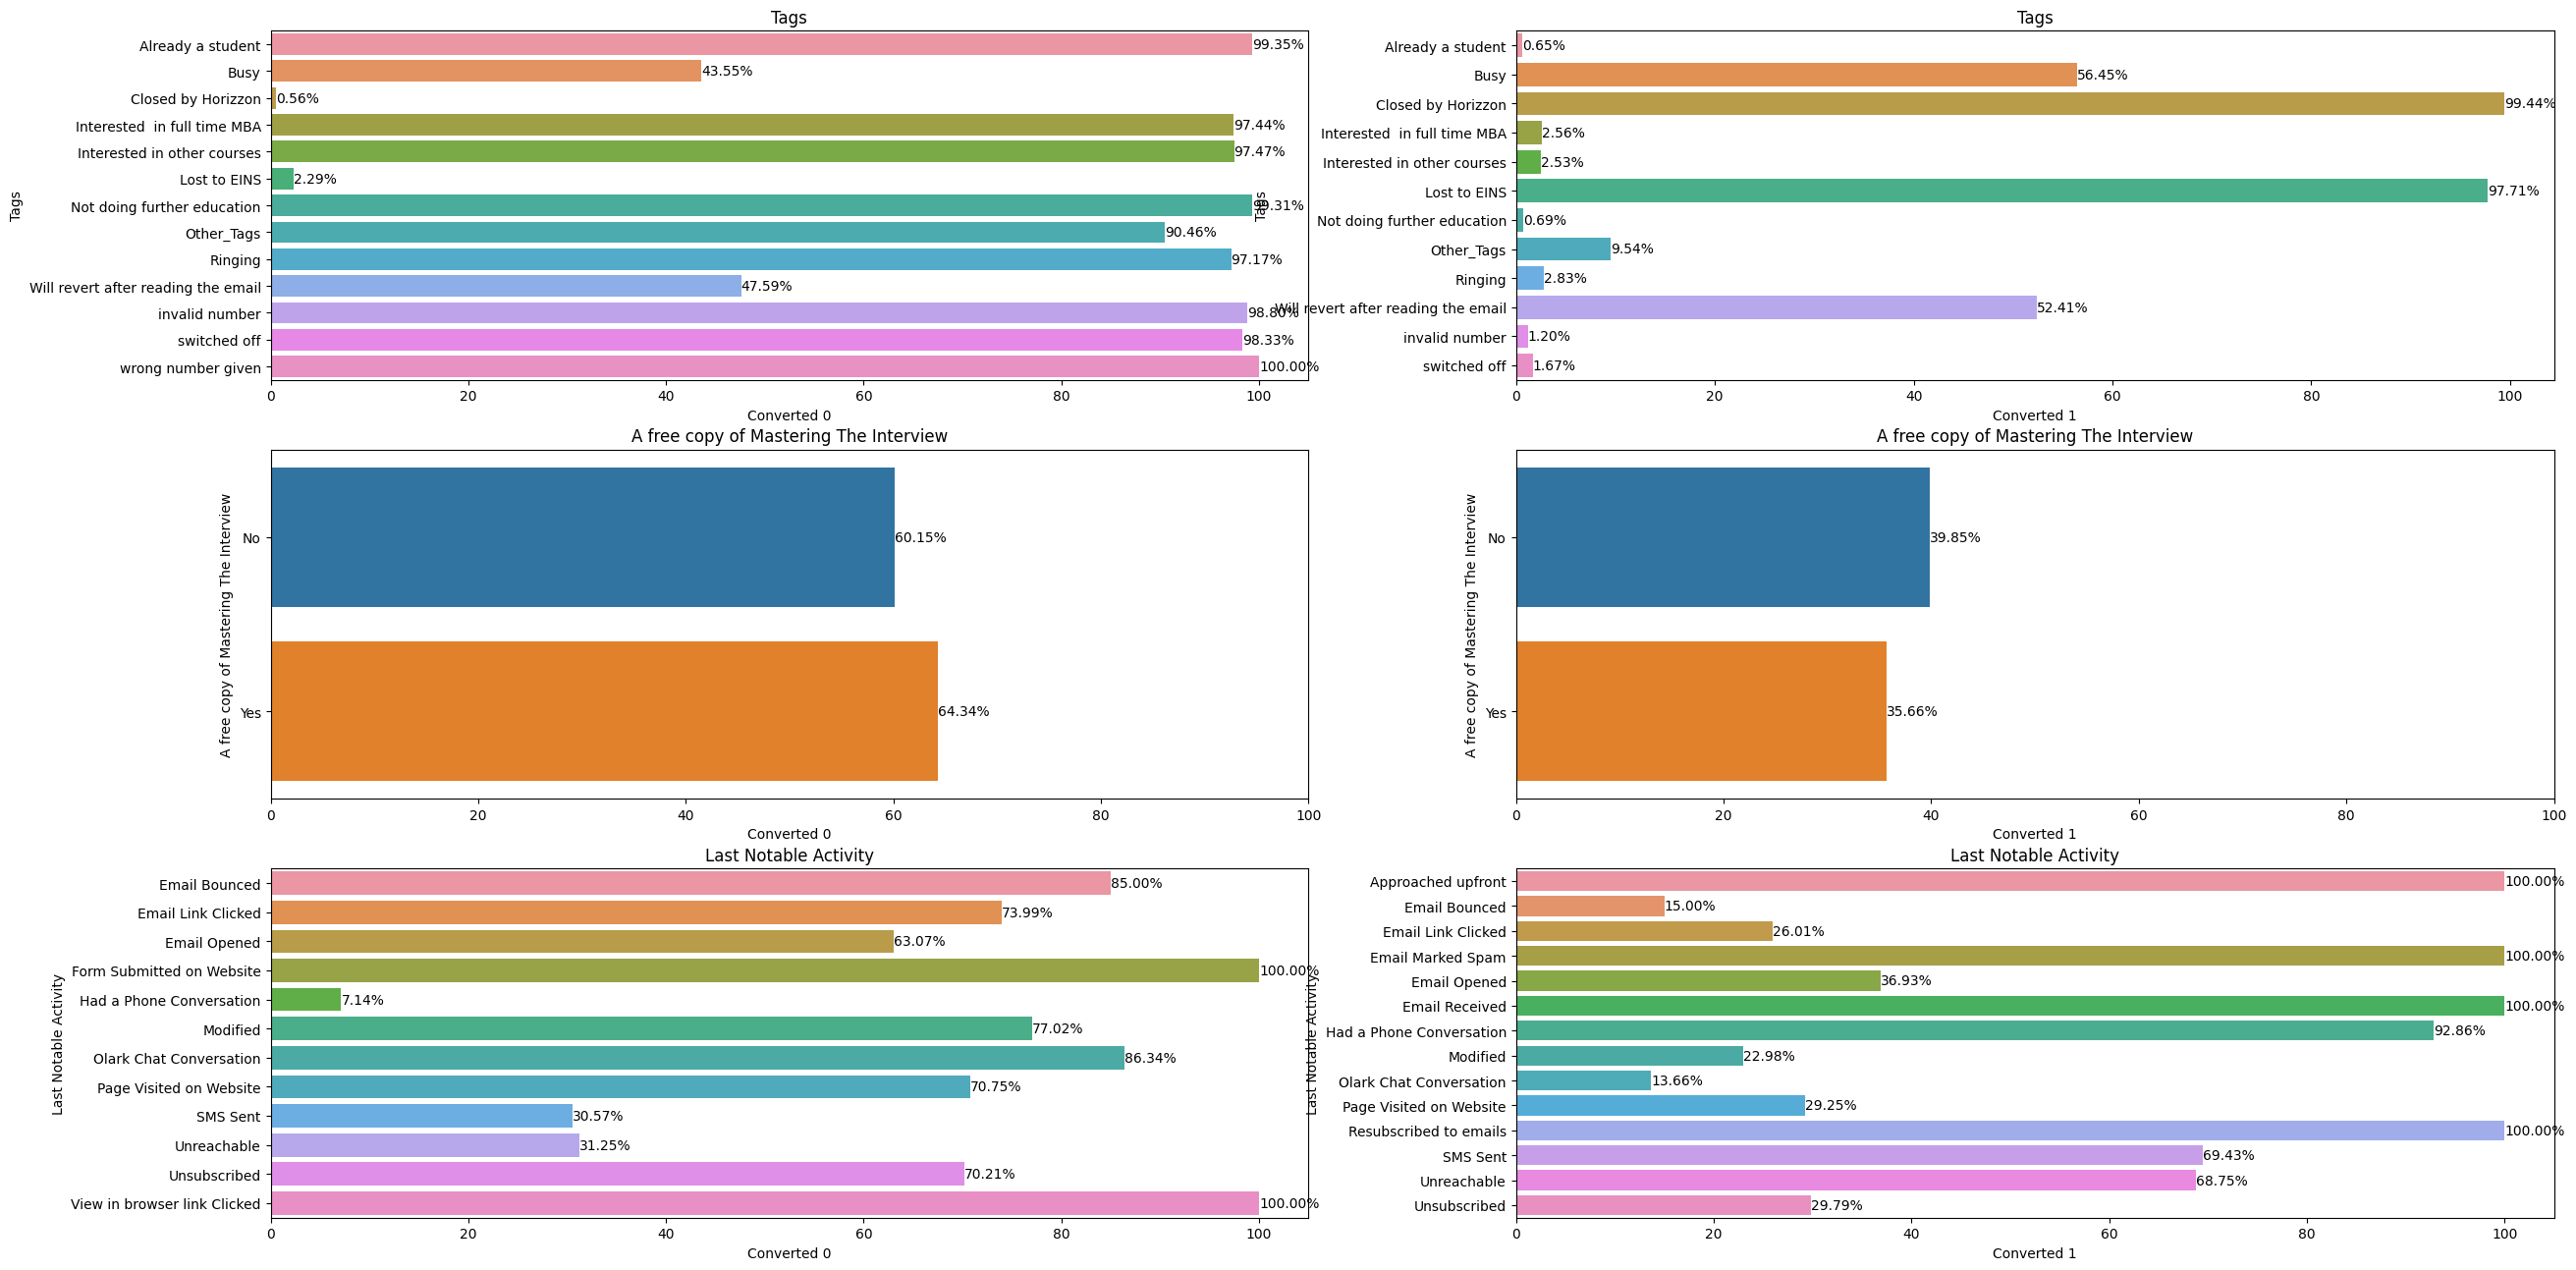

In [360]:
#Plotting a bar graph for analysing each category in the columns w.r.t Converted
plt.figure(figsize=(30,60))
for i in range(1,len(cat_cols)+1):

  x= cat_cols[i-1]
  apln_temp_df=leads_data_df.groupby([x,"Converted"]).size().reset_index(name='COUNTS')
  apln_temp_df["GRP_TOT"] = apln_temp_df.groupby(x)['COUNTS'].transform('sum')
  apln_temp_df["GRP_PCT"] = round(apln_temp_df["COUNTS"]/apln_temp_df["GRP_TOT"] * 100,2)

  plt.subplot(11,2,(2*i)-1)
  x_axis = apln_temp_df[apln_temp_df["Converted"]==0][x]
  y_axis = apln_temp_df[apln_temp_df["Converted"]==0]["GRP_PCT"]
  ax =sns.barplot(data=apln_temp_df,x=y_axis,y=x_axis)
  ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.2f}%')
  ticks = [0, 20, 40, 60,80,100]
  ax.set_xticks(ticks)
  #  plt.xticks(rotation=90)
  plt.title(x)
  plt.xlabel("Converted 0")

  plt.subplot(11,2,(2*i))
  x_axis = apln_temp_df[apln_temp_df["Converted"]==1][x]
  y_axis = apln_temp_df[apln_temp_df["Converted"]==1]["GRP_PCT"]
  ax =sns.barplot(data=apln_temp_df,x=y_axis,y=x_axis)
  ax.bar_label(ax.containers[0], fmt=lambda x: f'{x:0.2f}%')
  ticks = [0, 20, 40, 60,80,100]
  ax.set_xticks(ticks)
  #  plt.xticks(rotation=90)
  plt.title(x)
  plt.xlabel("Converted 1")

Highlights:
1. Leads with last notable activity as "Modified" are high however their conversion rate is just 22%.
2. Leads with last notable activity as "SMS sent" are having good converson rate of 69%
3.Leads with Tag "Will revert after reading the mail" are better leads with good conversion rate

#### **Continuos Columns**

Plotting box plots for better analysis of continuos columns

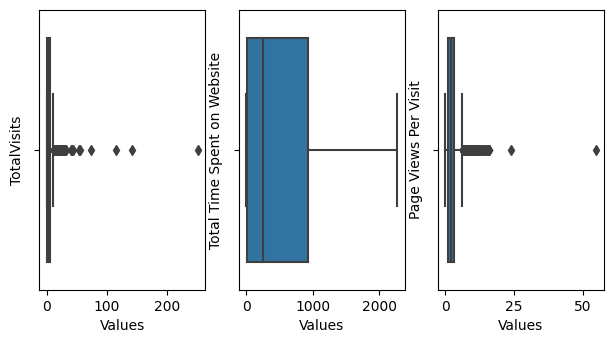

In [361]:
plt.figure(figsize=(15,8))
for i in range(1,len(cont_cols)+1):
  plt.subplot(2,6,i)
  x_val=cont_cols[i-1]
  sns.boxplot(data=leads_data_df, x=leads_data_df[x_val])
  plt.ylabel(x_val)
  plt.xlabel("Values")
  plt.yticks(rotation=90)


plt.tight_layout(pad=20.0)
plt.show()

Though there are outliers  in Total Visits Page vies per visists. Treating them

In [362]:
for i in ['Page Views Per Visit','TotalVisits']:
    percentiles = leads_data_df[i].quantile([0.05,0.95]).values
    leads_data_df[i][leads_data_df[i] <= percentiles[0]] = percentiles[0]
    leads_data_df[i][leads_data_df[i] >= percentiles[1]] = percentiles[1]

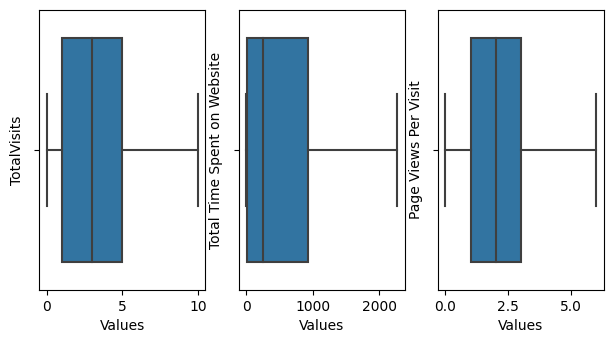

In [363]:
plt.figure(figsize=(15,8))
for i in range(1,len(cont_cols)+1):
  plt.subplot(2,6,i)
  x_val=cont_cols[i-1]
  sns.boxplot(data=leads_data_df, x=leads_data_df[x_val])
  plt.ylabel(x_val)
  plt.xlabel("Values")
  plt.yticks(rotation=90)


plt.tight_layout(pad=20.0)
plt.show()

### **Bivariate Analysis**

#### **Continuous Columns**

Using pair plots to check how the continuos columns are related to each other

<Figure size 1500x1200 with 0 Axes>

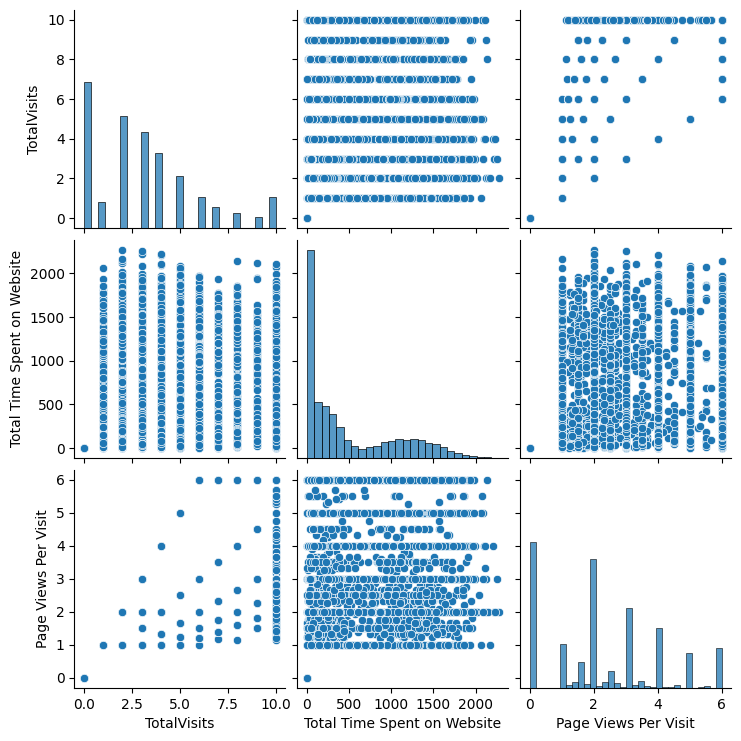

In [364]:
plt.figure(figsize=(15, 12))
plt.suptitle("Pair plots")

sns.pairplot(leads_data_df[cont_cols])

plt.show()

NOw, using Boxplots to see how these columns are related to Converted column

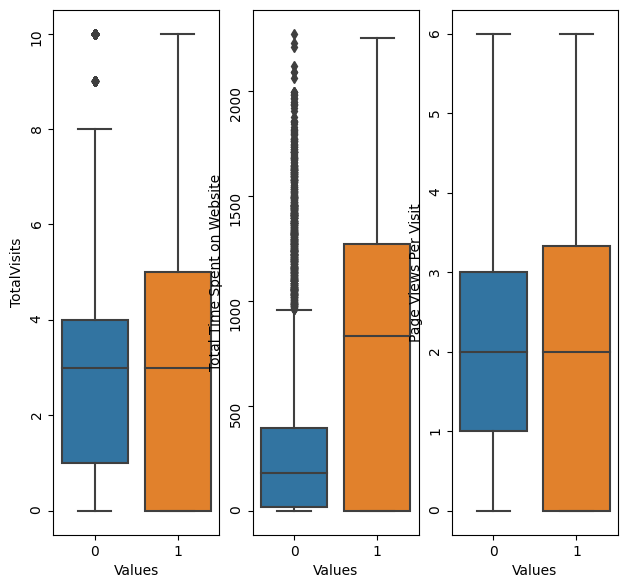

In [365]:
plt.figure(figsize=(15,15))
for i in range(1,len(cont_cols)+1):
  plt.subplot(2,6,i)
  x_val=cont_cols[i-1]
  sns.boxplot(data=leads_data_df, y=leads_data_df[x_val],x=leads_data_df['Converted'])
  plt.ylabel(x_val)
  plt.xlabel("Values")
  plt.yticks(rotation=90)


plt.tight_layout(pad=30.0)
plt.show()

**Highlights:**

1. The columns "TotalVisits" and "Page Views per visit" have positive correlation and nothing much can be inferred from them as of now
2. The column "Total Time spent on each visit seems to haev positive correlation with target column "Converted"

#### **Categorical columns**

The relation of categorical columns with the target varaible has already been seen earlier and inferences been drawn already

### **Multivariate Analysis**

Drawing heat map for understand correaltion between continuos variables

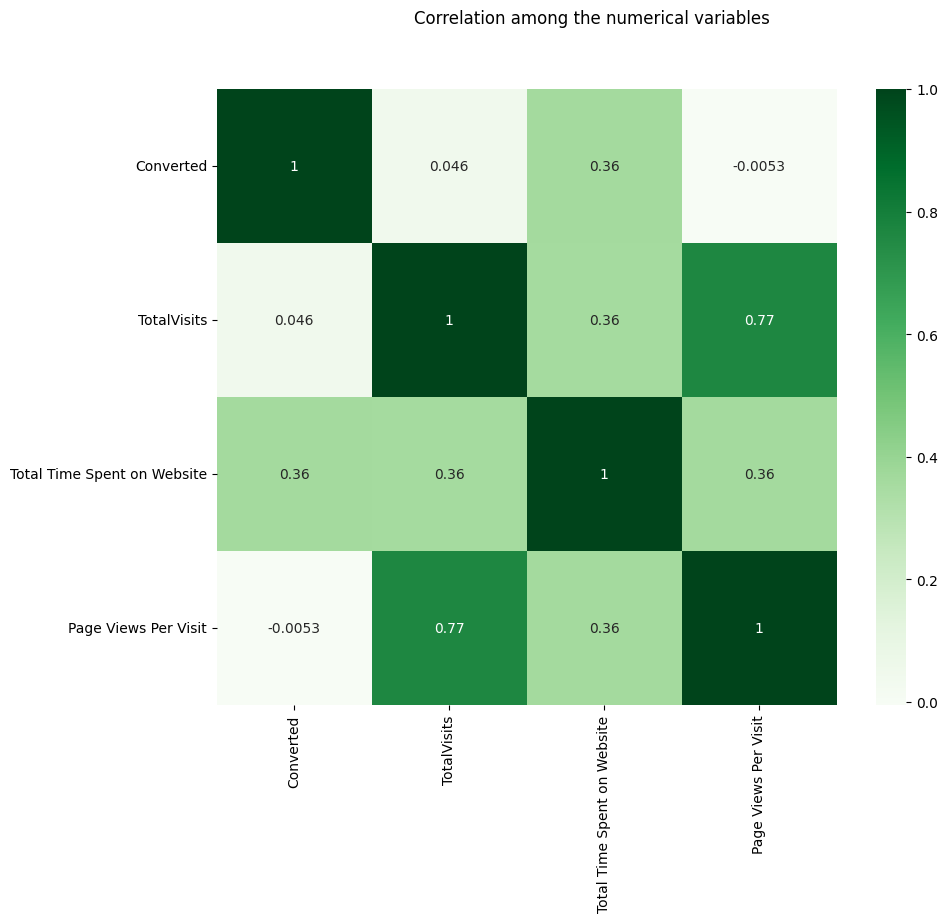

In [366]:
plt.figure(figsize=(10,8))
plt.suptitle("Correlation among the numerical variables")

sns.heatmap(leads_data_df.corr(),cmap="Greens",annot=True)
plt.show()

The above plot proves that Total Time Spent on Website has better correlation with Conveted column

### **Dropping Columns based on EDA**

Following columns can be dropped before proceding with model building based on our EDA inferences

In [367]:
leads_data_df.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course','Country','City','Tags'], axis = 1, inplace = True)

In [368]:
list(leads_data_df.columns)

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [369]:
leads_data_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other Activity,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Modified


In [370]:
leads_data_df.shape

(9240, 12)

## **Machine Learning Model Development**

### **Identifying the type of Machine Learning problem**

This is a suprvised ML problem as there is a target variable **Converted** avaialble.The target variable is discrete variable hence a **Logistic Regression** model has to be developed.

### **Creating Dummy Variables from non-binary Categorical columns**

In [371]:
# Using a copy of existing dataframe
leads_data_df_ml = leads_data_df.copy()
dum_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity','Specialization']
# creating the dummy variables:
dum=pd.get_dummies(leads_data_df_ml[dum_cols],drop_first=True)
leads_data_df_ml=pd.concat([leads_data_df_ml,dum],axis=1)
leads_data_df_ml=leads_data_df_ml.drop(dum_cols,axis=1)

In [372]:
leads_data_df_ml.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [373]:
leads_data_df_ml.shape

(9240, 57)

### **Train-Test Split**

In [374]:
X=leads_data_df_ml.drop("Converted",axis=1)
y=leads_data_df_ml[["Converted"]]

In [375]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [376]:
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


Splitting the dataset considering 80:20 ratio for train-test split

In [377]:
#considering 80:20 ratio for test-train split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [378]:
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (7392, 56)
Test X shape: (1848, 56)
Train y shape: (7392, 1)
Test y shape: (1848, 1)


### **Scaling**

In [379]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [380]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [381]:
X_train_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.2,0.060739,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.034771,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.694982,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [382]:
X_test_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management,Specialization_Media and Advertising,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0.8,0.444982,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.5,0.025968,0.833333,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### **Feature Selection**

Using RFE to select top 15 features

In [383]:
from sklearn.feature_selection import RFE#Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression

estimator=LogisticRegression()
selector=RFE(estimator,n_features_to_select=15)
selector.fit(X_train_scaled,y_train)
selector.support_

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False])

In [384]:
cols_to_keep=X_train_scaled.columns[selector.support_]

In [385]:
cols_to_keep

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Specialization_Others'],
      dtype='object')

In [386]:
X_train=X_train_scaled[cols_to_keep]
X_test=X_test_scaled[cols_to_keep]

In [387]:
# np.array(y_train["Converted"])

### **Model-1**

In [388]:
import statsmodels.api as sm

In [389]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [390]:
model1=sm.GLM(np.array(y_train["Converted"]),X_train_sm,family=sm.families.Binomial())
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3034.9
Date:                Mon, 20 Nov 2023   Deviance:                       6069.7
Time:                        07:17:44   Pearson chi2:                 8.04e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3993
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5324      0.120     -4.454      0.000      -0.767      -0.298
TotalVisits                                              0.8013      0.171      4.686      0.000       0.466       1.136
Total Time Spent on Website                              4.2301      0.147     28.772      0.000       3.942       4.518
Page Views Per Visit                                    -1.3030      0.178     -7.339      0.000      -1.651      -0.955
Lead Origin_Landing Page Submission                     -1.2904      0.115    -11.253      0.000      -1.515      -1.066
Lead Origin_Lead Add Form                                2.6985      0.185     14.572      0.000       2.336       3.061
Lead Source_Welingak Website                             2.5982      0.742      3.501      0.000       1.144       4.053
Do Not Email_Yes                                        -1.3992      0.158     -8.840      0.000      -1.709      -1.089
Last Activity_Other Activity                             0.9834      0.232      4.241      0.000       0.529       1.438
Last Activity_SMS Sent                                   1.3871      0.070     19.703      0.000       1.249       1.525
What is your current occupation_Housewife               23.0946   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
What is your current occupation_Working Professional     2.6333      0.180     14.649      0.000       2.281       2.986
Last Notable Activity_Had a Phone Conversation           2.2756      1.139      1.999      0.046       0.044       4.507
Last Notable Activity_Modified                          -1.0168      0.074    -13.748      0.000      -1.162      -0.872
Last Notable Activity_Olark Chat Conversation           -1.1287      0.308     -3.667      0.000      -1.732      -0.525
Specialization_Others                                   -1.1549      0.114    -10.093      0.000      -1.379      -0.931
========================================================================================================================
"""

In [391]:
#Dropping "What is your current occupation_Housewife"

X_train_sm=X_train_sm.drop(['What is your current occupation_Housewife'], axis = 1)
X_test_sm=X_test_sm.drop(['What is your current occupation_Housewife'],axis=1)

### **Model-2**

In [392]:
model2=sm.GLM(np.array(y_train["Converted"]),X_train_sm,family=sm.families.Binomial())
result2=model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3042.9
Date:                Mon, 20 Nov 2023   Deviance:                       6085.8
Time:                        07:17:44   Pearson chi2:                 8.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3980
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5251      0.119     -4.398      0.000      -0.759      -0.291
TotalVisits                                              0.7899      0.171      4.623      0.000       0.455       1.125
Total Time Spent on Website                              4.2285      0.147     28.792      0.000       3.941       4.516
Page Views Per Visit                                    -1.3005      0.177     -7.331      0.000      -1.648      -0.953
Lead Origin_Landing Page Submission                     -1.2843      0.115    -11.213      0.000      -1.509      -1.060
Lead Origin_Lead Add Form                                2.7120      0.185     14.664      0.000       2.350       3.074
Lead Source_Welingak Website                             2.5839      0.742      3.482      0.000       1.130       4.038
Do Not Email_Yes                                        -1.4037      0.158     -8.872      0.000      -1.714      -1.094
Last Activity_Other Activity                             0.9762      0.232      4.210      0.000       0.522       1.431
Last Activity_SMS Sent                                   1.3798      0.070     19.620      0.000       1.242       1.518
What is your current occupation_Working Professional     2.6255      0.180     14.613      0.000       2.273       2.978
Last Notable Activity_Had a Phone Conversation           2.2751      1.138      1.999      0.046       0.044       4.506
Last Notable Activity_Modified                          -1.0126      0.074    -13.720      0.000      -1.157      -0.868
Last Notable Activity_Olark Chat Conversation           -1.1304      0.308     -3.673      0.000      -1.734      -0.527
Specialization_Others                                   -1.1595      0.114    -10.141      0.000      -1.384      -0.935
========================================================================================================================
"""

In [393]:
#Dropping "Last Notable Activity_Had a Phone Conversation"

X_train_sm=X_train_sm.drop(['Last Notable Activity_Had a Phone Conversation'], axis = 1)
X_test_sm=X_test_sm.drop(['Last Notable Activity_Had a Phone Conversation'],axis=1)

### **Model-3**

In [394]:
model3=sm.GLM(np.array(y_train["Converted"]),X_train_sm,family=sm.families.Binomial())
result3=model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3045.7
Date:                Mon, 20 Nov 2023   Deviance:                       6091.5
Time:                        07:17:44   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3975
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5205      0.119     -4.362      0.000      -0.754      -0.287
TotalVisits                                              0.7974      0.170      4.678      0.000       0.463       1.131
Total Time Spent on Website                              4.2229      0.147     28.777      0.000       3.935       4.511
Page Views Per Visit                                    -1.3034      0.177     -7.355      0.000      -1.651      -0.956
Lead Origin_Landing Page Submission                     -1.2853      0.114    -11.233      0.000      -1.510      -1.061
Lead Origin_Lead Add Form                                2.7116      0.185     14.653      0.000       2.349       3.074
Lead Source_Welingak Website                             2.5897      0.742      3.490      0.000       1.135       4.044
Do Not Email_Yes                                        -1.4253      0.158     -9.008      0.000      -1.735      -1.115
Last Activity_Other Activity                             1.1222      0.219      5.115      0.000       0.692       1.552
Last Activity_SMS Sent                                   1.3797      0.070     19.618      0.000       1.242       1.518
What is your current occupation_Working Professional     2.6226      0.180     14.599      0.000       2.271       2.975
Last Notable Activity_Modified                          -1.0192      0.074    -13.818      0.000      -1.164      -0.875
Last Notable Activity_Olark Chat Conversation           -1.1317      0.308     -3.677      0.000      -1.735      -0.528
Specialization_Others                                   -1.1637      0.114    -10.185      0.000      -1.388      -0.940
========================================================================================================================
"""

Since P-values are all good now, checking the VIF

In [395]:
# Make a VIF dataframe for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.66
4,Lead Origin_Landing Page Submission,3.20
13,Specialization_Others,2.93
3,Page Views Per Visit,2.86
1,TotalVisits,2.51
5,Lead Origin_Lead Add Form,1.63
6,Lead Source_Welingak Website,1.27
2,Total Time Spent on Website,1.21
10,What is your current occupation_Working Profes...,1.15
11,Last Notable Activity_Modified,1.13


The VIF is also giving good values.So the model seems to be good.

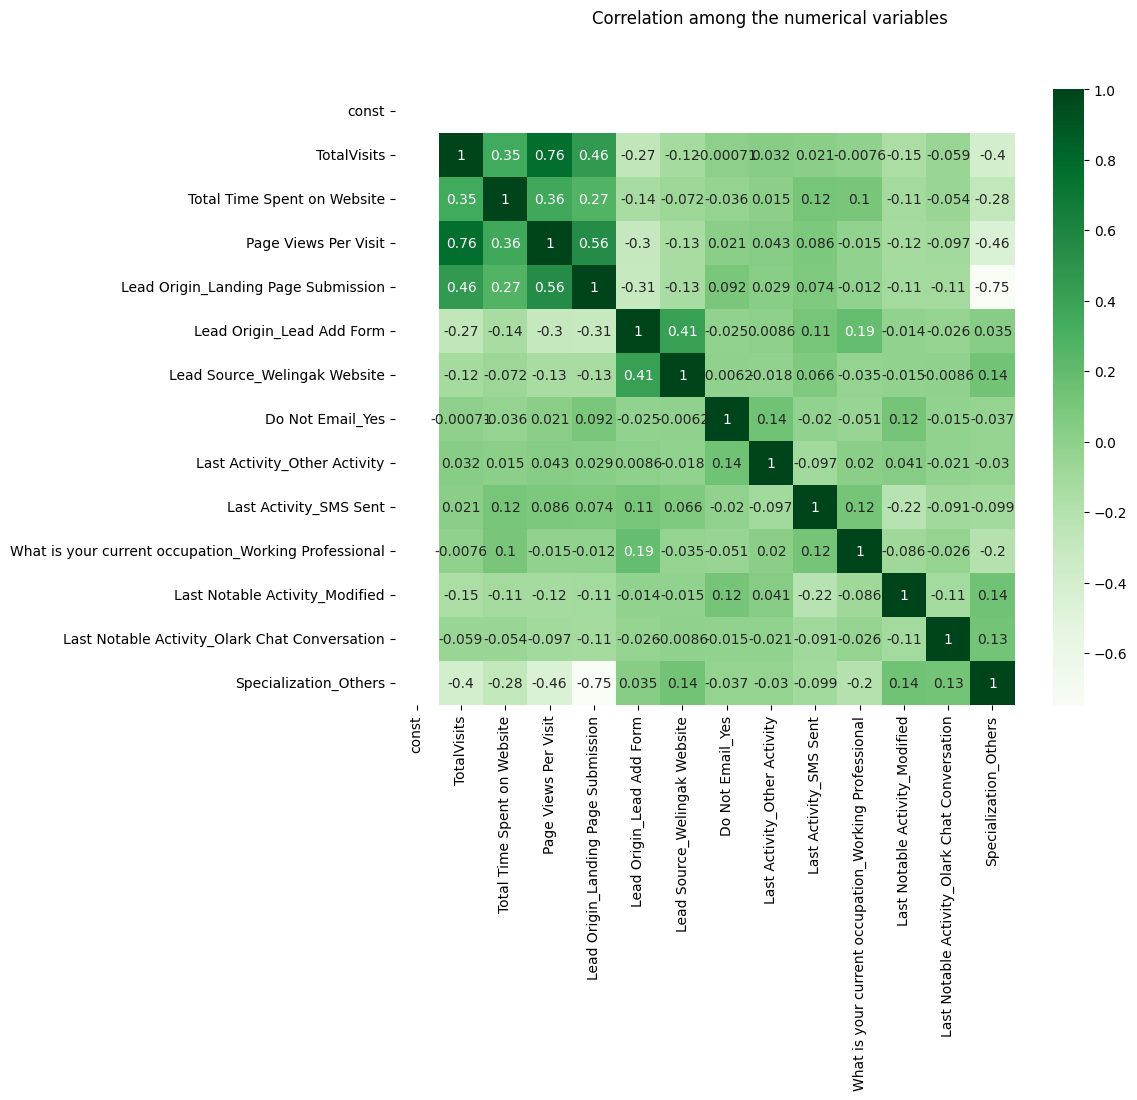

In [396]:
#Correlation among the final variables
plt.figure(figsize=(10,8))
plt.suptitle("Correlation among the numerical variables")

sns.heatmap(X_train_sm.corr(),cmap="Greens",annot=True)
plt.show()

## **Model Evaluation**

Predicting the probabilties on the train dataset

In [397]:
y_train_pred = result3.predict(sm.add_constant(X_train_sm))
y_train_pred[:10]

0    0.062777
1    0.390658
2    0.364888
3    0.876405
4    0.062777
5    0.998237
6    0.062777
7    0.923115
8    0.675232
9    0.062777
dtype: float64

In [398]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06277697, 0.39065787, 0.36488833, 0.87640516, 0.06277697,
       0.99823665, 0.06277697, 0.92311481, 0.67523231, 0.06277697])

In [399]:
y_train_pred_final = pd.DataFrame({'Converted':np.array(y_train["Converted"]), 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.062777
1,0,0.390658
2,1,0.364888
3,0,0.876405
4,0,0.062777


Adding a new "Predicted" column, which is calculated based on the conversion probability. For initial prediction we are uing 0.5 as cut-off probability

In [400]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.062777,0
1,0,0.390658,0
2,1,0.364888,0
3,0,0.876405,1
4,0,0.062777,0


Evaluating the model based on the above Predicted column and Converted column. Using these we create the confusion matrix

In [401]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[4078  485]
 [ 907 1922]]


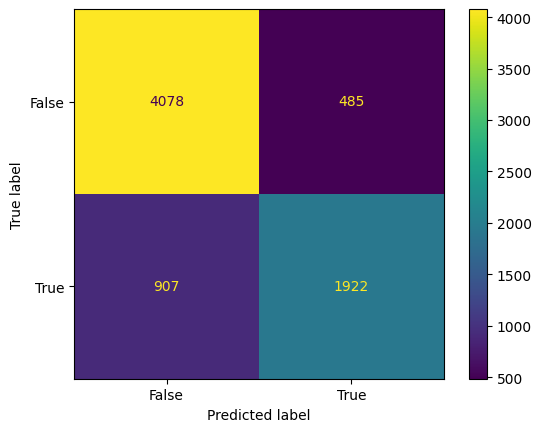

In [402]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

NOw using these we are calculating the metrics "Accuracy",Sensitivity and Specificity

In [403]:
print("Accuracy: ",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy:  0.8116883116883117


In [404]:
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [405]:
print("Sensitivity: ",TP/(TP+FN))

Sensitivity:  0.6793920113114175


In [406]:
print("Specificity: ",TN/(TN+FP))

Specificity:  0.893710278325663


### **Finding Optimum Cut-Off**

Using roc_curve to get the AUC Score

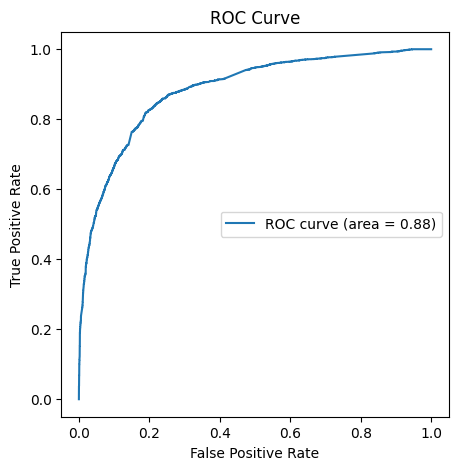

________________________________________
Area under the Curve(AUC): (area = 0.88)
________________________________________


In [407]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )
AUC = metrics.roc_auc_score( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob )
plt.figure(figsize=(5, 5))
plt.plot( false_positive_rate, true_positive_rate, label='ROC curve (area = %0.2f)' % AUC )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="right")
plt.show()

print("________________________________________")
print("Area under the Curve(AUC): (area = %0.2f)" % AUC)
print("________________________________________")

Creating different probability cut-off columns

In [408]:
prob_vals = [float(x)/10 for x in range(10)]
for i in prob_vals:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.062777,0,1,0,0,0,0,0,0,0,0,0
1,0,0.390658,0,1,1,1,1,0,0,0,0,0,0
2,1,0.364888,0,1,1,1,1,0,0,0,0,0,0
3,0,0.876405,1,1,1,1,1,1,1,1,1,1,0
4,0,0.062777,0,1,0,0,0,0,0,0,0,0,0


In [409]:
# CReatinga  dataframe to check accuracy,sensitivity and specificity values for eavh cut-off values from 0.1 to 1.0
from sklearn.metrics import confusion_matrix
prob_cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

values = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in values:
    new_conf_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(new_conf_matrix))
    accuracy = (new_conf_matrix[0,0]+new_conf_matrix[1,1])/total1

    specificity = new_conf_matrix[0,0]/(new_conf_matrix[0,0]+new_conf_matrix[0,1])
    sensitivity = new_conf_matrix[1,1]/(new_conf_matrix[1,0]+new_conf_matrix[1,1])
    prob_cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(prob_cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.382711     1.000000     0.000000
0.1   0.1  0.602949     0.967480     0.376945
0.2   0.2  0.757982     0.897844     0.671269
0.3   0.3  0.801272     0.848710     0.771861
0.4   0.4  0.812229     0.776600     0.834320
0.5   0.5  0.811688     0.679392     0.893710
0.6   0.6  0.804248     0.610110     0.924611
0.7   0.7  0.793019     0.540474     0.949595
0.8   0.8  0.765287     0.430541     0.972825
0.9   0.9  0.716856     0.277483     0.989261


From above Cut-off dtaframe rows , its seen that if the probability cut-off could be best somewhere between 0.3 and 0.4. We can check using a line plot with all these metrices and check the point of convergence

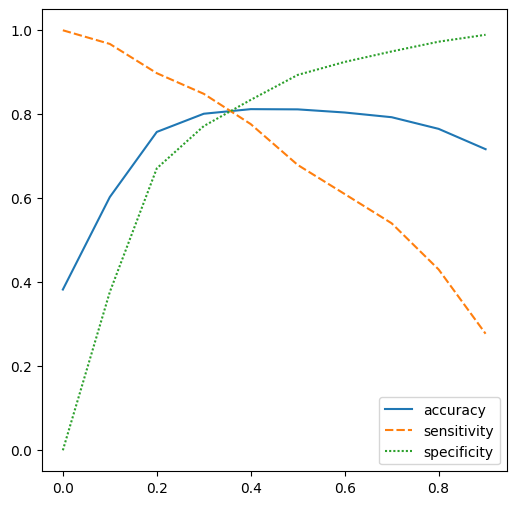

In [410]:
plt.figure(figsize=(6,6))
sns.lineplot(data=prob_cutoff_df[['accuracy','sensitivity','specificity']])
plt.show()

The above plot also confirms that the cut-off probability can be between 0.3 and 0.4. Its seems around **0.35**. So considering the same.

Now calculating the final predicted value based on the cut-off probablity 0.35

In [411]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.062777,0,1,0,0,0,0,0,0,0,0,0,0,6
1,0,0.390658,0,1,1,1,1,0,0,0,0,0,0,1,39
2,1,0.364888,0,1,1,1,1,0,0,0,0,0,0,1,36
3,0,0.876405,1,1,1,1,1,1,1,1,1,1,0,1,88
4,0,0.062777,0,1,0,0,0,0,0,0,0,0,0,0,6


Recalculating the metrics "Accuracy",Sensitivity and Specificity based on final_predicted column and with new confusion matrix

In [412]:
print("Accuracy: ",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy:  0.810741341991342


In [413]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3657,  906],
       [ 493, 2336]])

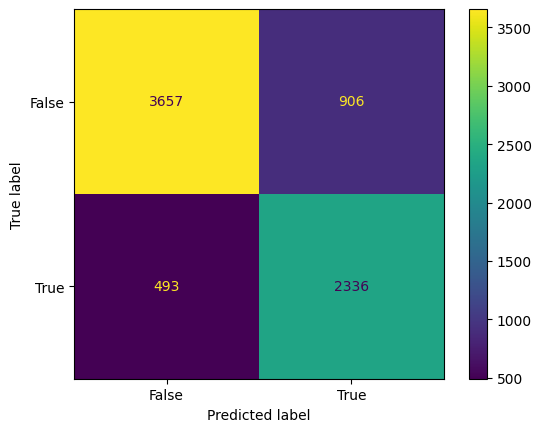

In [414]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion2, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [415]:
TP = confusion2[1,1] # True Positive
TN = confusion2[0,0] # True Negative
FP = confusion2[0,1] # False Positive
FN = confusion2[1,0] # False Negative

In [416]:
print("Sensitivity: ",TP/(TP+FN))

Sensitivity:  0.8257334747260516


In [417]:
print("Specificity: ",TN/(TN+FP))

Specificity:  0.8014464168310322


Based on the above metrics 0.35 seems to be a good cutoff probability

### **Predicting the Conversion in Test Data**

We already updating the test dataframe with the required features while performing RFE on train data

In [418]:
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Other Activity,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Specialization_Others
0,1.0,0.8,0.444982,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.5,0.025968,0.833333,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Predicting using model-3**

In [419]:
y_test_pred = result3.predict((X_test_sm))

**Converting y_test_pred to a dataframe**

In [420]:

y_pred_1 = pd.DataFrame(y_test_pred)

**creating y_test_df from y_test for better understanding**

In [421]:
y_test_df = pd.DataFrame(y_test)

**Joining both the dataframes**

In [422]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_test_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_test_final= y_pred_test_final.rename(columns = {0 : 'Conversion_Prob'})

In [423]:
y_pred_test_final.head()

,Converted,Conversion_Prob
0,1,0.712835
1,1,0.917371
2,1,0.933794
3,0,0.062777
4,1,0.899449


**Predicting the conversion using probability cut-off as 0.35 and checking the metrics**

In [424]:
y_pred_test_final['final_predicted'] = y_pred_test_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_test_final['Lead_Score'] = y_pred_test_final.Conversion_Prob.map( lambda x: round(x*100))

In [425]:
# Check y_pred_final

y_pred_test_final.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1,0.712835,1,71
1,1,0.917371,1,92
2,1,0.933794,1,93
3,0,0.062777,0,6
4,1,0.899449,1,90


In [426]:
print("Accuracy :",metrics.accuracy_score(y_pred_test_final['Converted'], y_pred_test_final['final_predicted']))

Accuracy : 0.8084415584415584


In [427]:
confusion_test = metrics.confusion_matrix(y_pred_test_final['Converted'], y_pred_test_final['final_predicted'] )
confusion_test

array([[899, 217],
       [137, 595]])

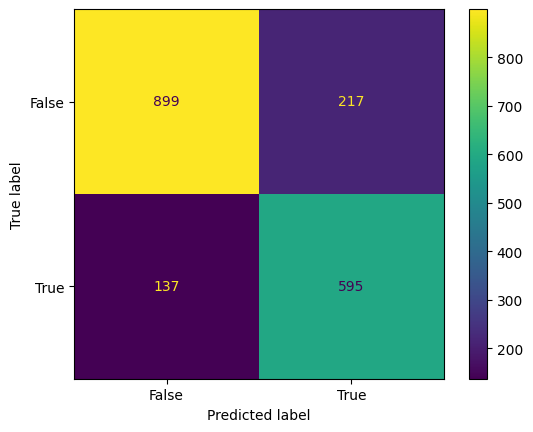

In [428]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_test, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [429]:
TP = confusion_test[1,1] # True Positive
TN = confusion_test[0,0] # True Negative
FP = confusion_test[0,1] # False Positive
FN = confusion_test[1,0] # False Negative

In [430]:
print("Sensitivity :",TP /(TP+FN))

Sensitivity : 0.8128415300546448


In [431]:
print("Specificity: ",TN/(TN+FP))

Specificity:  0.8055555555555556


### **Precision & Recall**

In [432]:
confusion_train = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
confusion_train

array([[3657,  906],
       [ 493, 2336]])

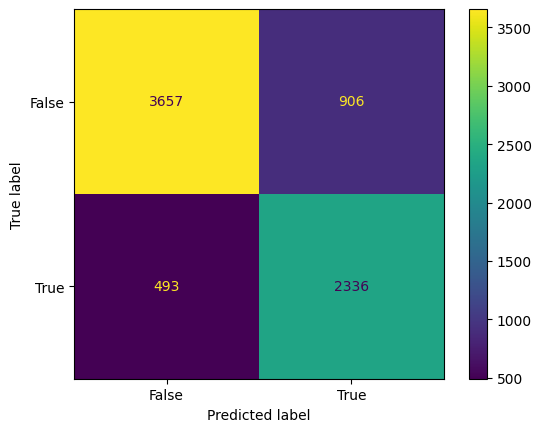

In [433]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_train, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [434]:
TP = confusion_train[1,1] # True Positive
TN = confusion_train[0,0] # True Negative
FP = confusion_train[0,1] # False Positive
FN = confusion_train[1,0] # False Negative

In [435]:
print("Precsion: ",TP/(TP + FP))

Precsion:  0.7205428747686613


In [436]:
print("Recall: ",TP /(TP + FN))

Recall:  0.8257334747260516


### **Precision & Recall tradeoff**

**Finding a better probability cut-ff based on precision_recall_curve**

In [437]:
from sklearn.metrics import precision_recall_curve

In [438]:
#y_train_pred_final.Converted, y_train_pred_final.Predicted

In [439]:
precision, recall, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

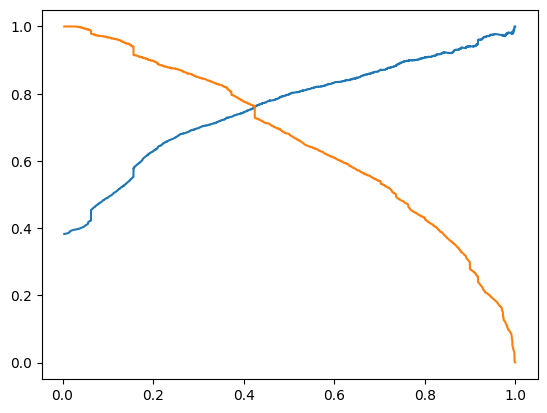

In [440]:
plt.plot(thresholds, precision[:-1])
plt.plot(thresholds, recall[:-1])
plt.show()

In [441]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.062777,0,1,0,0,0,0,0,0,0,0,0,0,6
1,0,0.390658,0,1,1,1,1,0,0,0,0,0,0,1,39
2,1,0.364888,0,1,1,1,1,0,0,0,0,0,0,1,36
3,0,0.876405,1,1,1,1,1,1,1,1,1,1,0,1,88
4,0,0.062777,0,1,0,0,0,0,0,0,0,0,0,0,6


**Checking Accuracy and other metrices again**

In [442]:
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.810741341991342


In [443]:
confusion_train_new = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion_train_new

array([[3657,  906],
       [ 493, 2336]])

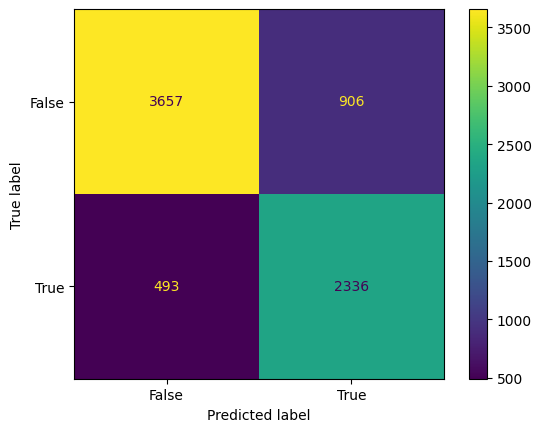

In [444]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_train_new, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [445]:
TP = confusion_train_new[1,1] # True Positive
TN = confusion_train_new[0,0] # True Negative
FP = confusion_train_new[0,1] # False Positive
FN = confusion_train_new[1,0] # False Negative

In [446]:
print("Sensitivity :",TP /(TP+FN))

Sensitivity : 0.8257334747260516


In [447]:
print("Specificity: ",TN/(TN+FP))

Specificity:  0.8014464168310322


In [448]:
print("Precsion: ",TP/(TP + FP))

Precsion:  0.7205428747686613


In [449]:
print("Recall: ",TP /(TP + FN))

Recall:  0.8257334747260516


Cut-off looks good now

**Getting Recall and Precision on Test data**

In [450]:
y_pred_test_final['final_predicted'] = y_pred_test_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_test_final['Lead_Score'] = y_pred_test_final.Conversion_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.062777,0,1,0,0,0,0,0,0,0,0,0,0,6
1,0,0.390658,0,1,1,1,1,0,0,0,0,0,0,1,39
2,1,0.364888,0,1,1,1,1,0,0,0,0,0,0,1,36
3,0,0.876405,1,1,1,1,1,1,1,1,1,1,0,1,88
4,0,0.062777,0,1,0,0,0,0,0,0,0,0,0,0,6


In [451]:
print("Accuracy :",metrics.accuracy_score(y_pred_test_final['Converted'], y_pred_test_final.final_predicted))

Accuracy : 0.8084415584415584


In [452]:
confusion_test_new = metrics.confusion_matrix(y_pred_test_final['Converted'], y_pred_test_final.final_predicted )
confusion_test_new

array([[899, 217],
       [137, 595]])

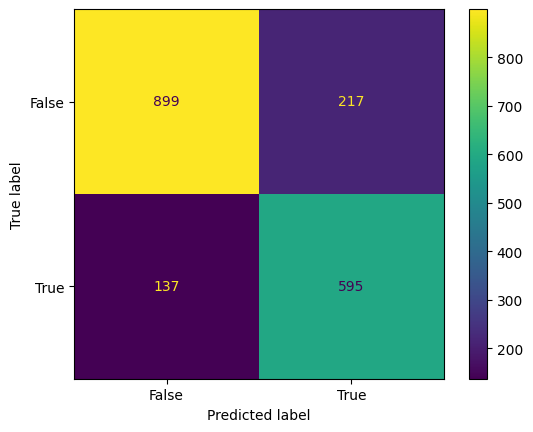

In [453]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_test_new, \
                                            display_labels = [False, True])
cm_display.plot()
plt.show()

In [454]:
TP = confusion_test_new[1,1] # True Positive
TN = confusion_test_new[0,0] # True Negative
FP = confusion_test_new[0,1] # False Positive
FN = confusion_test_new[1,0] # False Negative

In [455]:
print("Sensitivity :",TP /(TP+FN))

Sensitivity : 0.8128415300546448


In [456]:
print("Specificity: ",TN/(TN+FP))

Specificity:  0.8055555555555556


In [457]:
print("Precsion: ",TP/(TP + FP))

Precsion:  0.7327586206896551


In [458]:
print("Recall: ",TP /(TP + FN))

Recall:  0.8128415300546448


All the metrics seem good for both train and test data

### **Hot Leads**

Cobsidering a lead score of 90% as a threshold for hot leads

In [459]:
Hot_Leads=y_pred_test_final.loc[y_pred_test_final["Lead_Score"]>=90]
len(Hot_Leads)

214

In [460]:
Hot_Leads.head(20)

,Converted,Conversion_Prob,final_predicted,Lead_Score
1,1,0.917371,1,92
2,1,0.933794,1,93
4,1,0.899449,1,90
13,1,0.943718,1,94
15,1,0.899449,1,90
33,1,0.993286,1,99
40,1,0.984659,1,98
49,1,0.989899,1,99
88,1,0.987033,1,99
92,1,0.922298,1,92


In [461]:
Cold_Leads=y_pred_test_final.loc[y_pred_test_final["Lead_Score"]<90]
len(Cold_Leads)

1634

In [462]:
Cold_Leads.head(20)

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1,0.712835,1,71
3,0,0.062777,0,6
5,1,0.471656,1,47
6,1,0.351978,1,35
7,1,0.218806,0,22
8,0,0.069266,0,7
9,1,0.367921,1,37
10,0,0.349425,0,35
11,0,0.157772,0,16
12,1,0.889274,1,89


## **Suggestions**

**Company sould focus on leads with**

a.	Lead Origin_Landing Page Submission

b.	Lead Origin_Lead Add Form

c.	Lead Source_Welingak Website

d.  High Total_Visits

e.  High Time spent on the website

f.  High count on page views per visit

g. current occupation as "Working Professionals"


**Company sould ignore leads**

a. who opted for "Don't Email","Do'nt Call"

b. who are unemployed

c. with last notable activity "Olark Chat COnversation"

## **Conclusion**

With the help of the final model an accuracy of 81%, a sensitivity/recall of 81%, a precision of 73% and a specificity of 80% were achieved. The model has achieved a sensitivity of 81% which at part with the desired 80% conversion rate of the X Education Company.